# Tugas Besar IF2220 Probabilitas dan Statistika


> 13522057 Mohammad Fairuz Alauddin Yahya

> 13522095 Rayhan Fadhlan Azka

## Inisialisasi library

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

df = pd.read_csv("phone.csv")


## Problem 1

#### Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 


In [93]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df_numeric = df.select_dtypes(include=[np.number])
def get_mode(x):
    try:
        mode = x.mode()[1]
        mode = 'multivalued'
    except:
        mode = x.mode()[0]
    return mode 
stat = pd.DataFrame()

stat["Mean"] = df_numeric.mean()
stat["Median"] = df_numeric.median()
stat["Mode"] = df_numeric.apply(get_mode)
stat["Deviasi"] = df_numeric.std()
stat["Var"] = df_numeric.var()
stat["Min"] = df_numeric.min()
stat["Max"] = df_numeric.max()
stat["Range"] = stat["Max"] - stat["Min"]
stat["Q1"] = df_numeric.quantile(0.25)
stat["Q2"] = df_numeric.quantile(0.5)
stat["Q3"] = df_numeric.quantile(0.75)
stat["IQR"] = stat["Q3"] - stat["Q1"]
stat["Skewness"] = df_numeric.skew()
stat["Kurtosis"] = df_numeric.kurtosis()
stat

,Mean,Median,Mode,Deviasi,Var,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
battery_power,1920.877299,1922.399154,multivalued,136.278720,1.857189e+04,1420.954271,2401.957818,981.003547,1834.014686,1922.399154,2011.295713,177.281027,-0.041291,0.220792
clock_speed,1.102641,1.100199,multivalued,0.300748,9.044962e-02,0.063078,2.145640,2.082561,0.902938,1.100199,1.308174,0.405236,-0.042815,0.050614
ram,6.051994,6.016748,multivalued,2.010296,4.041289e+00,-2.140214,12.147370,14.287584,4.689994,6.016748,7.413723,2.723729,0.062848,-0.048518
n_cores,12.044035,12.072605,multivalued,2.235806,4.998827e+00,5.634702,22.191140,16.556438,10.561141,12.072605,13.542862,2.981721,0.009754,0.015851
use_time,8.044158,8.033139,multivalued,1.184142,1.402191e+00,3.994350,11.856342,7.861993,7.279726,8.033139,8.869837,1.590111,-0.072757,0.026641
px_width,728.718192,728.653821,multivalued,0.701806,4.925318e-01,726.673319,731.401917,4.728598,728.229459,728.653821,729.177175,0.947716,0.392639,0.032217
px_height,1035.293102,1035.366543,multivalued,0.701960,4.927481e-01,1032.823317,1037.509932,4.686615,1034.864311,1035.366543,1035.792837,0.928526,-0.446624,0.110403
5g,0.507224,0.509358,multivalued,0.288386,8.316620e-02,0.000147,2.000000,1.999853,0.255934,0.509358,0.755849,0.499915,0.058566,-0.872118
price,7964.742750,7983.607488,0.0,2006.150234,4.024639e+06,-1.000000,15293.505980,15294.505980,6657.919039,7983.607488,9247.301479,2589.382440,-0.037486,0.266474


<p>Dapat dilihat data tersebut memiliki nilai ram dan price yang negatif, dimana hal tersebut tidak logis, sehingga kami melakukan cleansing data dengan menghapus baris yang memiliki data negatif tersebut</p>

#### Nilai Modus yang memiliki multivalue

In [94]:
df.mode()

,battery_power,clock_speed,ram,n_cores,use_time,px_width,px_height,brand,5g,grade,price
0,1420.954271,0.063078,-2.140214,5.634702,3.994350,726.673319,1032.823317,sumseng,0.000147,A,0.0
1,1477.965749,0.086511,0.071127,5.640941,4.160599,726.877207,1032.940610,NaN,0.001635,NaN,NaN
2,1488.948363,0.178785,0.434078,5.705081,4.257735,726.969832,1032.981014,NaN,0.001847,NaN,NaN
3,1493.397642,0.188163,0.473096,5.740562,4.670485,726.992626,1033.001635,NaN,0.003802,NaN,NaN
4,1506.515170,0.202770,0.547202,5.748217,4.675472,727.102922,1033.013906,NaN,0.003835,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,2321.463264,1.954328,12.036310,18.273326,11.539920,730.855474,1036.916911,NaN,0.998860,NaN,NaN
1996,2331.185458,1.974235,12.037179,18.452401,11.542616,730.908714,1036.921031,NaN,0.999076,NaN,NaN
1997,2352.078882,1.981452,12.096538,18.774827,11.649750,730.930922,1036.926264,NaN,0.999077,NaN,NaN
1998,2363.451821,2.056815,12.139339,19.697229,11.765387,730.941198,1037.038778,NaN,0.999216,NaN,NaN


<p> nilai modus multivalue ini mencapai 2000 data karena di setiap kolom memiliki nilai yang berbeda-beda, sehingga kemunculan terbanyak adalah satu kali kemunculan </p>

#### Deskripsi statistika kolom data yang berupa string

In [95]:
unique_values = df['brand'].value_counts(normalize=True)

unique_values_df = pd.DataFrame(unique_values)
unique_values_df

,proportion
brand,
sumseng,0.3375
oranye,0.2390
largeyou,0.2125
appa,0.2095
undefined,0.0015


In [96]:
unique_values = df['grade'].value_counts(normalize=True)

unique_values_df = pd.DataFrame(unique_values)
unique_values_df

,proportion
grade,
A,0.3465
B,0.3415
C,0.3120


## Problem 2
#### Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

### Mencari Kolom Data yang Memiliki Outlier

Pencarian outlier dilakukan dengan menggunakan formula berikut:

- **Lower Outlier**: `Lower Outlier = Q1 - 1.5 * IQR`
- **Higher Outlier**: `Higher Outlier = Q3 + 1.5 * IQR`
- dimana **IQR (Interquartile Range)**: `IQR = Q3 - Q1`

In [97]:
# Inisialisasi list untuk menyimpan hasil
results = []
# Loop melalui setiap kolom numerik
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    left_outliers = np.sum(df[col] < lower_bound)
    right_outliers = np.sum(df[col] > upper_bound)
    
    
     # Menambahkan data paling minimum dan maksimum dari lower bound dan upper bound
    lower_bound_min = df[col].min() if left_outliers > 0 else None  # Data paling minimum dari lower bound
    lower_bound_max = df[df[col] <= lower_bound].max()  if left_outliers > 0 else None  # Data paling maksimum dari lower bound
    upper_bound_min = df[df[col] >= upper_bound].min()  if right_outliers > 0 else None  # Data paling minimum dari upper bound
    upper_bound_max = df[col].max() if right_outliers > 0 else None  # Data paling maksimum dari upper bound
    
    # Menyimpan hasil ke dalam list
    results.append({
        'Column': col,
        'Left Outliers Count': left_outliers,
        'Right Outliers Count': right_outliers,
        'Outliers Total': right_outliers+left_outliers,
        'Min Left Outliers': lower_bound_min,
        'Max Left Outliers': lower_bound_max[col] if left_outliers > 0 else None,
        'Min Right Outliers': upper_bound_min[col] if right_outliers > 0 else None,
        'Max Right Outliers': upper_bound_max,
        'Any Outliers': right_outliers+left_outliers > 0,
    })

# Membuat DataFrame dari hasil
outliers_df = pd.DataFrame(results)

outliers_df

,Column,Left Outliers Count,Right Outliers Count,Outliers Total,Min Left Outliers,Max Left Outliers,Min Right Outliers,Max Right Outliers,Any Outliers
0,battery_power,15,11,26,1420.954271,1566.283517,2277.238065,2401.957818,True
1,clock_speed,9,6,15,0.063078,0.287064,1.917131,2.145640,True
2,ram,6,7,13,-2.140214,0.592505,11.656129,12.147370,True
3,n_cores,9,7,16,5.634702,6.073804,18.017614,22.191140,True
4,use_time,7,8,15,3.994350,4.827739,11.356261,11.856342,True
5,px_width,1,16,17,726.673319,726.673319,730.605495,731.401917,True
6,px_height,21,1,22,1032.823317,1033.426948,1037.509932,1037.509932,True
7,5g,0,1,1,NaN,NaN,2.000000,2.000000,True
8,price,11,8,19,-1.000000,2769.668542,13170.143430,15293.505980,True


<p>Hasil perhitungan outliers tersebut menunjukkan bahwa setiap kolom numerik memiliki outliers. Dapat dilihat bahwa nilai "any outliers" pada semua kolom numerik bernilai True. Outlier adalah data yang secara signifikan berbeda dari pola umum data lainnya, yang dapat menjadi masalah karena outlier bisa mempengaruhi analisis statistik dan model prediktif.</p>

<p>Pada konteks data ini bisa terjadi dikarenakan pada data phone tersebut mungkin terdapat kesenjangan spesifikasi phone yang menyebabkan nilai semua atributnya timpang. Dapat dibuktikan bahwa data outliers berjumlah kurang dari 30 data dari total 2000 data, dimana kesenjangan pada beberapa tipe phone tersebut mungkin terjadi, yakni terdapat phone yang sangat modern dan memiliki spesifikasi maksimum dan ada juga phone yang sangat jadul.</p>

<p>Terdapat beberapa hal yang dapat dilakukan untuk handling outliers, antara lain:</p>

<ol>
  <li><strong>Penghapusan:</strong> Jika outlier disebabkan oleh kesalahan pengukuran atau data yang tidak relevan, pertimbangkan untuk menghapus outlier dari dataset yang harus dilakukan dengan hati-hati dan hanya setelah memastikan bahwa outlier tidak mewakili informasi yang valid.</li>
  <li><strong>Transformasi Data</strong> Yakni dengan mengubah skala data atau menerapkan transformasi matematis seperti logaritma, atau mengganti menjadi nilai ekstremum dari data dapat membantu menangani outlier yang dapat membantu menjadikan distribusi data lebih normal dan mengurangi dampak outlier pada analisis.</li>
  <li><strong>Resampling Data</strong> Resampling memungkinkan pembuatan sampel baru dari data yang ada, sehingga nilai ekstrem dalam dataset tidak memiliki dampak yang berlebihan pada hasil analisis.
</li>
</ol>

Namun berdasarkan data yang ada, dapat dilihat pada rentang left bahwa terdapat data yang tidak valid, yaitu bernilai negatif pada kolom RAM dan price. Data ini tidak mungkin terjadi karena tidak ada phone yang memiliki RAM negatif atau transaksi dengan nilai negatif. Oleh karena itu, untuk tipe data seperti ini, penghapusan data adalah langkah yang tepat.

Sedangkan untuk data outliers lainnya, tidak perlu dihapus. Sebaliknya, cukup dilakukan transformasi data. Setiap kolom seperti battery power, clock speed, RAM, dan lainnya merepresentasikan spesifikasi maksimum dan minimum pada sebuah data. Oleh karena itu, transformasi yang dipilih adalah dengan mengubah nilai outliers tersebut menjadi batas maksimum atau minimum yang wajar dalam dataset.

### Cleansing Data Outliers

In [98]:
# Set into lower bound and upper bound
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Handling outliers
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound
    
# Hapus nilai yang negatif
df = df[df['price'] > 0] 
df = df[df['ram'] > 0]

### Pengecekan update data outliers

In [99]:
# Inisialisasi list untuk menyimpan hasil
results = []
# Loop melalui setiap kolom numerik
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    left_outliers = np.sum(df[col] < lower_bound)
    right_outliers = np.sum(df[col] > upper_bound)
    
    # Menyimpan hasil ke dalam list
    results.append({
        'Column': col,
        'Outliers Total': right_outliers+left_outliers,
        'Any Outliers': right_outliers+left_outliers > 0,
    })

# Membuat DataFrame dari hasil
outliers_df = pd.DataFrame(results)

outliers_df

,Column,Outliers Total,Any Outliers
0,battery_power,0,False
1,clock_speed,0,False
2,ram,0,False
3,n_cores,0,False
4,use_time,0,False
5,px_width,0,False
6,px_height,0,False
7,5g,0,False
8,price,0,False


## Problem 3

#### Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 


### Membuat general function untuk plot data

In [100]:
dataHeader = df.columns

plt.rcParams['boxplot.boxprops.linewidth'] = 2
plt.rcParams['boxplot.whiskerprops.linewidth'] = 2
plt.rcParams['boxplot.capprops.linewidth'] = 2
plt.rcParams['boxplot.medianprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.marker'] = 'o'
plt.rcParams['boxplot.flierprops.markersize'] = 8
plt.rcParams['boxplot.flierprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.markeredgecolor'] = '#ab1ba5'


In [101]:
import numpy as np

# Create Histogram for each numeric column
def generate_histogram_numeric(col, df):
    fig, ax1 = plt.subplots(figsize=(11, 5))

    # Histogram
    ax1.set_title(f'Distribution and Summary of {col.upper()}')
    counts, bins, _ = ax1.hist(df[col], bins=10, rwidth=0.8, color="#ab1ba5")
    ax1.set_facecolor('#d7dbe2')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')

    # Annotate the histogram with counts and bins
    for count, x in zip(counts, bins[:-1]):
        ax1.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom', color='black')

    # Calculate and display key statistics
    summary_stats = df[col].describe()

    stats_text = f"""
    Mean: {summary_stats['mean']:.2f}
    Median: {summary_stats['50%']:.2f}
    Std Dev: {summary_stats['std']:.2f}
    Min: {summary_stats['min']:.2f}
    Max: {summary_stats['max']:.2f}
    Skewness: {df[col].skew():.3f}
    Concentration: {1 / summary_stats['std'] ** 2 :.5f}
    """

    props = dict(boxstyle='round', facecolor='#d7dbe2', alpha=0.5)
    ax1.text(0.95, 0.95, stats_text, transform=ax1.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

    plt.tight_layout()
    plt.show()

# Generate box plot for each numeric column
def generate_boxplot_numeric(col, df):
    fig, ax2 = plt.subplots(figsize=(11, 5))

    # Boxplot
    ax2.boxplot(df[col], vert=False, widths=0.5, patch_artist=True,
                boxprops=dict(facecolor='#e5bae4', color='#ab1ba5'),
                capprops=dict(color='#ab1ba5'),
                medianprops=dict(color='#ab1ba5'),
                flierprops=dict(markerfacecolor='#ab1ba5', markeredgecolor='#ab1ba5'),
                whiskerprops=dict(color='#ab1ba5'))
    ax2.set_facecolor('#d7dbe2')
    ax2.set_xlabel(col)
    ax2.set_ylabel('Value')
    ax2.tick_params(axis='y', which='both', length=0)
    ax2.yaxis.tick_right()

    plt.tight_layout()
    plt.show()
    
# Generate histogram for each string column
def generate_histogram_string(col, df):
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(unique_values, value_counts, color='#ab1ba5')
    ax.set_title(f'Count of Unique Values in {col.upper()}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticks(unique_values)
    ax.tick_params(axis='x', rotation=45)
    ax.set_facecolor('#d7dbe2')

    # Annotate bars with exact values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom', color='black')

    plt.tight_layout()
    plt.show()


def generate_plot(col):
        display(Markdown(f"<h3 style='text-align:center; text-transform: uppercase'> {col.replace("_", " ")} </h3>"))
        # Check is numeric data 
        if np.issubdtype(df[col].dtype, np.number):
            generate_histogram_numeric(col, df)
            generate_boxplot_numeric(col, df)
        else:
            generate_histogram_string(col, df)


<h3 style='text-align:center; text-transform: uppercase'> battery power </h3>

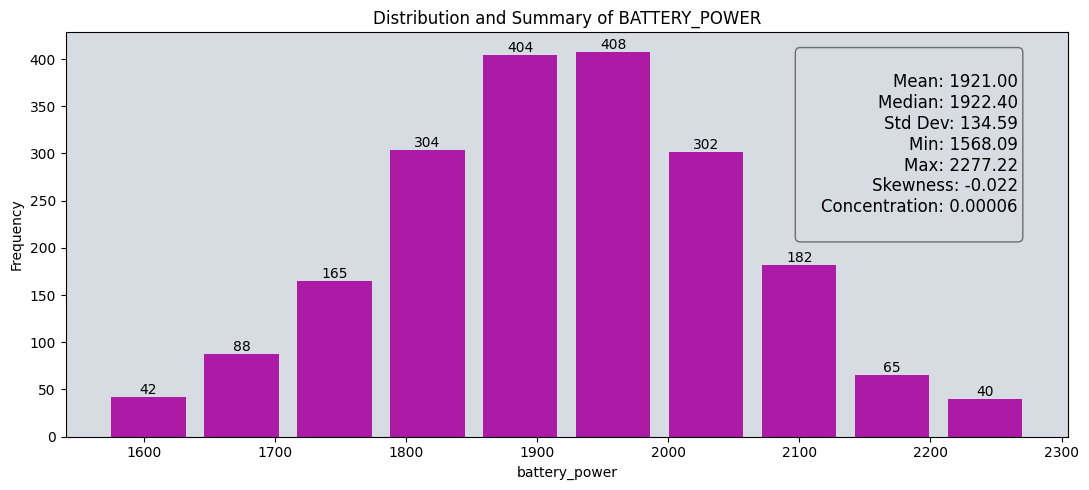

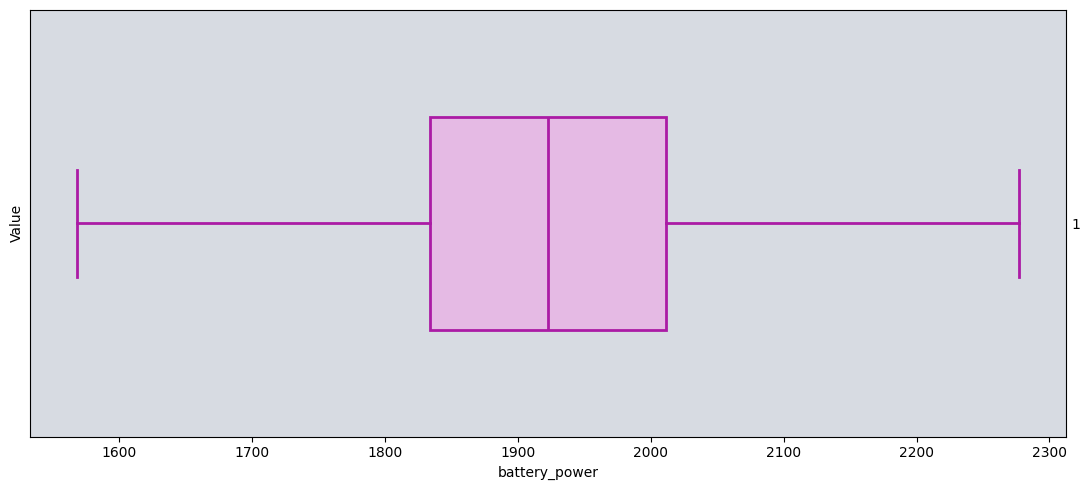

In [102]:
generate_plot(dataHeader[0])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *Battery Power* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Besar: <br/>
Dapat dilihat bahwa terdapat variasi data yang besar di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) sangat luas, menunjukkan bahwa titik data tersebar cukup jauh dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup tinggi, yang menandakan bahwa data memiliki penyebaran yang besar di sekitar mean.

2. Distribusi Heterogen:<br/>
Meskipun terdapat variasi yang besar, titik data tersebar merata atau terdistribusi secara heterogen. Ini menunjukkan bahwa tidak ada konsentrasi yang tinggi pada nilai tertentu, melainkan data tersebar secara luas dan relatif merata di seluruh rentang nilai yang ada. Distribusi yang merata ini mengindikasikan bahwa tidak ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu.

3. Skewness yang Hampir Simetris:<br/>
Skewness yang ditunjukkan oleh data adalah hampir simetris sempurna, di mana distribusi data memiliki sedikit kecenderungan pada sisi kiri (negatif skew), namun kecenderungan tersebut sangat kecil. Ini bisa disimpulkan bahwa distribusi data tersebut hampir simetris. Distribusi yang hampir simetris menunjukkan bahwa median dan mean data tidak terlalu berbeda, yang mengindikasikan tidak adanya outlier yang signifikan atau pergeseran yang ekstrem pada salah satu sisi distribusi.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa daya baterai pada ponsel sangat bervariasi luas dan tersebar secara merata. Ini berarti bahwa ada berbagai kapasitas daya baterai yang cukup luas di pasar, dan tidak ada satu pun nilai kapasitas yang mendominasi. Hal ini penting untuk dipertimbangkan bagi produsen ponsel, karena menunjukkan adanya permintaan yang beragam untuk daya baterai yang bervariasi.

<h3 style='text-align:center; text-transform: uppercase'> clock speed </h3>

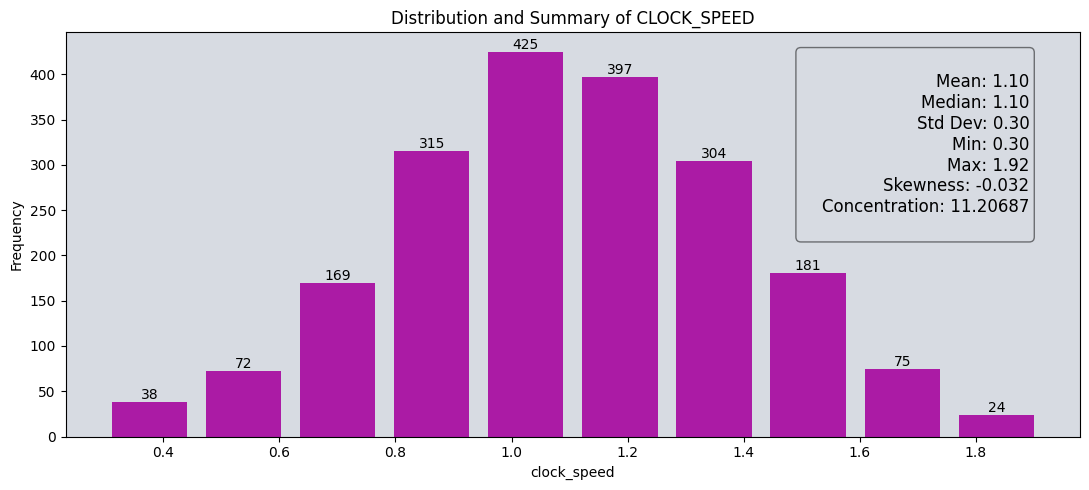

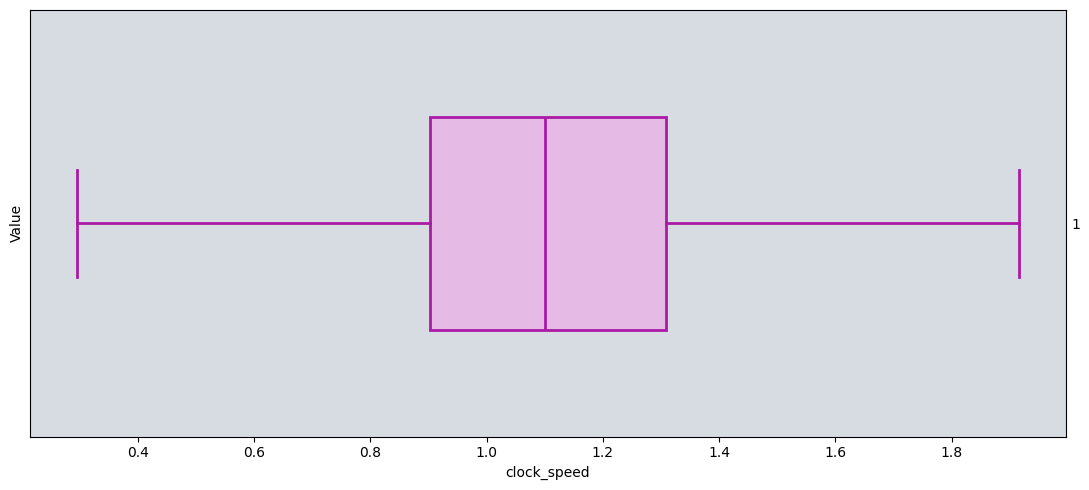

In [103]:
generate_plot(dataHeader[1])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *Clock Speed* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Rendah: <br/>
Dapat dilihat bahwa terdapat variasi data yang rendah di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) lumayan sempit, menunjukkan bahwa titik data tersebar berdekatan dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup rendah, yang menandakan bahwa data memiliki penyebaran yang terfokus di sekitar mean.

2. Distribusi Homogen:<br/>
Meskipun terdapat variasi yang rendah, titik data terfokus di sekitar mean atau distribusi homogen. Ini menunjukkan bahwa data memiliki konsentrasi yang tinggi pada nilai tertentu. Distribusi yang terfokus ini mengindikasikan bahwa ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu, menunjukkan bahwa sebagian besar ponsel memiliki kecepatan jam yang serupa.

3. Skewness yang Hampir Simetris:<br/>
Skewness yang ditunjukkan oleh data adalah hampir simetris sempurna, di mana distribusi data memiliki sedikit kecenderungan pada sisi kiri (negatif skew), namun kecenderungan tersebut sangat kecil. Ini bisa disimpulkan bahwa distribusi data tersebut hampir simetris. Distribusi yang hampir simetris menunjukkan bahwa median dan mean data tidak terlalu berbeda, yang mengindikasikan tidak adanya outlier yang signifikan atau pergeseran yang ekstrem pada salah satu sisi distribusi.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa kecepatan clock pada ponsel memiliki kemiripan yang tinggi sehingga memiliki fokus di sekitar satu titik mean. Ini berarti bahwa ada satu nilai fokus sebagai standar yang diadopsi oleh banyak ponsel di pasaran. Hal ini bisa menunjukkan bahwa kecepatan clock tertentu telah menjadi norma industri atau bahwa ada batasan teknologi yang membuat variasi kecepatan clock menjadi sempit.

<h3 style='text-align:center; text-transform: uppercase'> ram </h3>

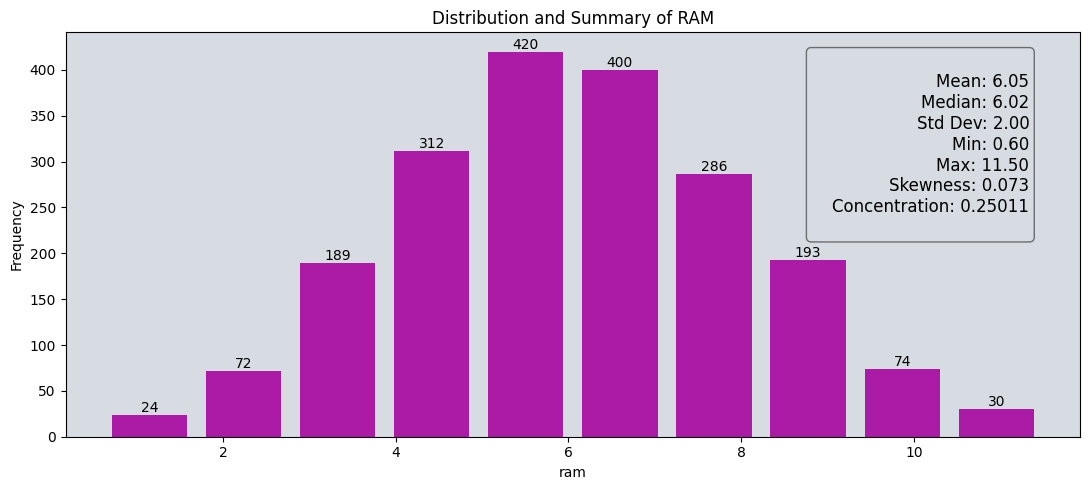

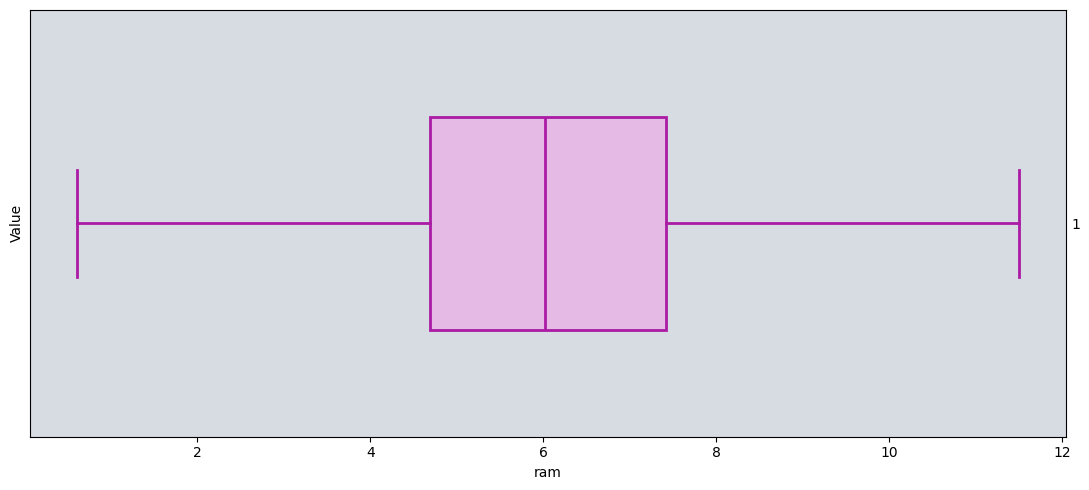

In [104]:
generate_plot(dataHeader[2])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *RAM* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Besar: <br/>
Dapat dilihat bahwa terdapat variasi data yang besar di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) sangat luas, menunjukkan bahwa titik data tersebar cukup jauh dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup tinggi, yang menandakan bahwa data memiliki penyebaran yang besar di sekitar mean.

2. Distribusi Heterogen:<br/>
Meskipun terdapat variasi yang besar, titik data tersebar merata atau terdistribusi secara heterogen. Ini menunjukkan bahwa tidak ada konsentrasi yang tinggi pada nilai tertentu, melainkan data tersebar secara luas dan relatif merata di seluruh rentang nilai yang ada. Distribusi yang merata ini mengindikasikan bahwa tidak ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu.

3. Skewness yang Hampir Simetris:<br/>
Skewness yang ditunjukkan oleh data adalah hampir simetris, di mana distribusi data memiliki sedikit kecenderungan pada sisi kanan (positive skew), namun kecenderungan tersebut sangat kecil. Ini bisa disimpulkan bahwa distribusi data tersebut hampir simetris. Distribusi yang hampir simetris menunjukkan bahwa median dan mean data tidak terlalu berbeda, yang mengindikasikan tidak adanya outlier yang signifikan atau pergeseran yang ekstrem pada salah satu sisi distribusi.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa RAM pada ponsel menunjukkan variasi yang besar dan distribusi yang heterogen. Ini menandakan bahwa kapasitas RAM pada ponsel bervariasi luas dan tidak terkonsentrasi pada nilai-nilai tertentu. Distribusi yang hampir simetris menunjukkan bahwa distribusi kapasitas RAM tidak memiliki kecenderungan yang signifikan pada satu sisi tertentu, yang dapat diartikan bahwa berbagai kapasitas RAM tersedia di pasaran dengan tingkat ketersediaan yang relatif merata.

<h3 style='text-align:center; text-transform: uppercase'> n cores </h3>

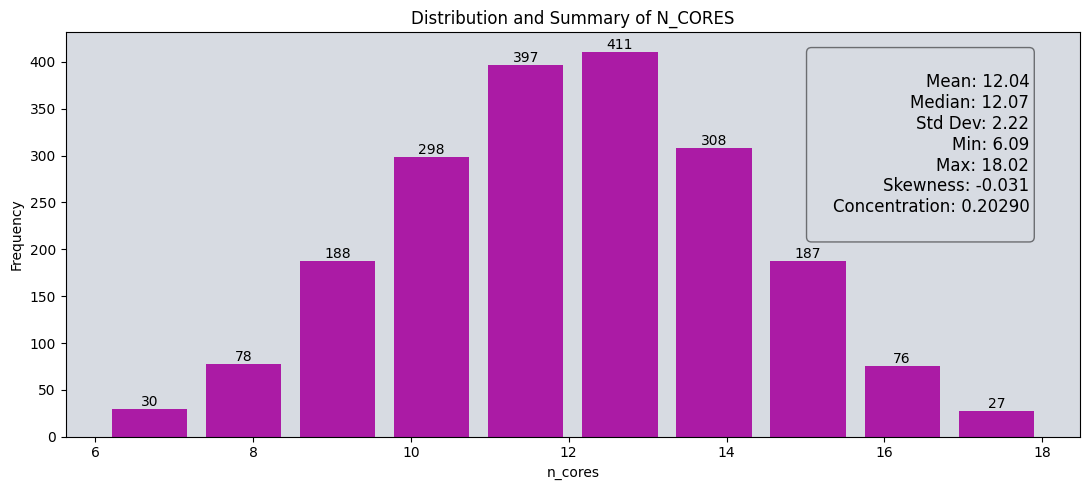

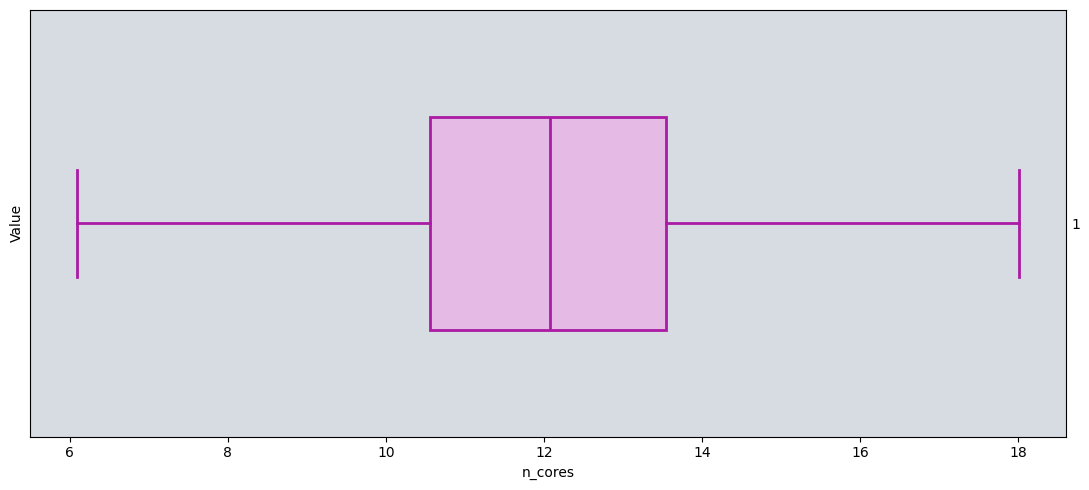

In [105]:
generate_plot(dataHeader[3])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *N Cores* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Besar: <br/>
Dapat dilihat bahwa terdapat variasi data yang besar di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) sangat luas, menunjukkan bahwa titik data tersebar cukup jauh dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup tinggi, yang menandakan bahwa data memiliki penyebaran yang besar di sekitar mean.

2. Distribusi Heterogen:<br/>
Meskipun terdapat variasi yang besar, titik data tersebar merata atau terdistribusi secara heterogen. Ini menunjukkan bahwa tidak ada konsentrasi yang tinggi pada nilai tertentu, melainkan data tersebar secara luas dan relatif merata di seluruh rentang nilai yang ada. Distribusi yang merata ini mengindikasikan bahwa tidak ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu.

3. Skewness yang Hampir Simetris:<br/>
Skewness yang ditunjukkan oleh data adalah hampir simetris, di mana distribusi data memiliki sedikit kecenderungan pada sisi kiri (negatif skew), namun kecenderungan tersebut sangat kecil. Ini bisa disimpulkan bahwa distribusi data tersebut hampir simetris. Distribusi yang hampir simetris menunjukkan bahwa median dan mean data tidak terlalu berbeda, yang mengindikasikan tidak adanya outlier yang signifikan atau pergeseran yang ekstrem pada salah satu sisi distribusi.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa N Cores atau jumlah cores pada ponsel memiliki variasi yang besar dan distribusi yang heterogen. Ini menandakan bahwa jumlah cores pada ponsel bervariasi luas dan tidak terkonsentrasi pada nilai-nilai tertentu. Distribusi yang hampir simetris menunjukkan bahwa distribusi jumlah cores tidak memiliki kecenderungan yang signifikan pada satu sisi tertentu, yang dapat diartikan bahwa berbagai jumlah cores tersedia di pasaran dengan tingkat ketersediaan yang relatif merata. Hal ini juga dapat mengindikasikan bahwa produsen ponsel telah mengadopsi berbagai konfigurasi cores untuk memenuhi kebutuhan pengguna yang beragam.

<h3 style='text-align:center; text-transform: uppercase'> use time </h3>

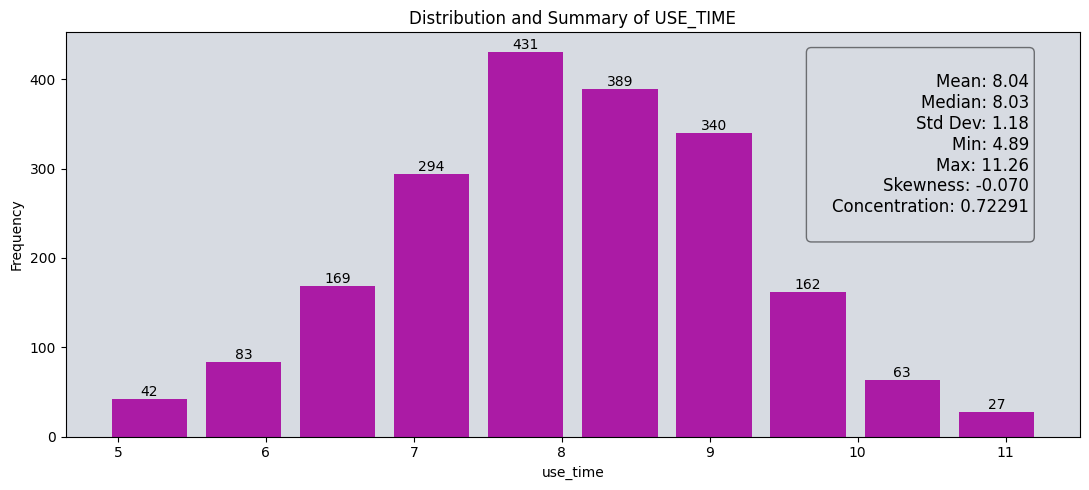

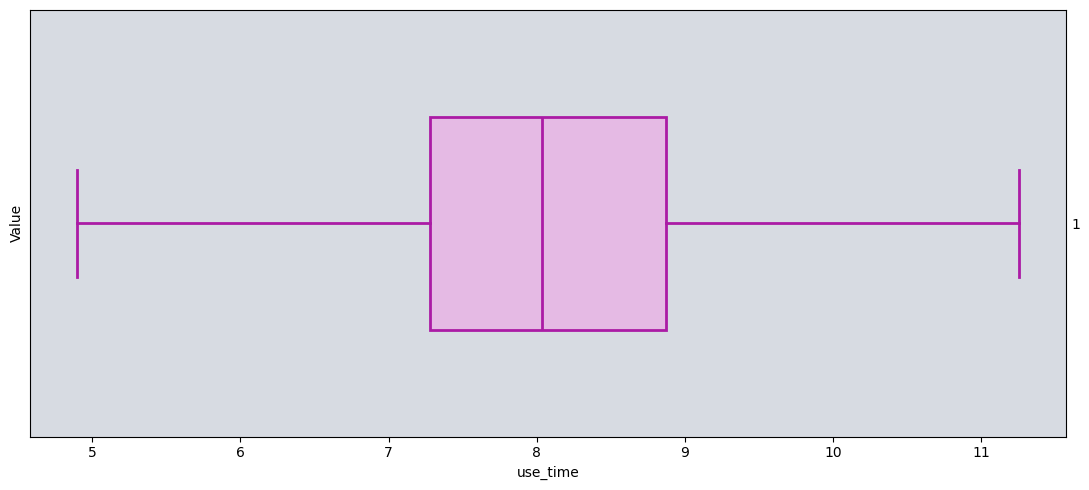

In [106]:
generate_plot(dataHeader[4])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *Use Time* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Besar: <br/>
Dapat dilihat bahwa terdapat variasi data yang besar di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) sangat luas, menunjukkan bahwa titik data tersebar cukup jauh dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup tinggi, yang menandakan bahwa data memiliki penyebaran yang besar di sekitar mean.

2. Distribusi Sedikit Cenderung Homogen:<br/>
Meskipun terdapat variasi yang besar, titik data terfokus di sekitar mean atau distribusi homogen. Ini menunjukkan bahwa data memiliki konsentrasi yang tinggi pada nilai tertentu. Distribusi yang terfokus ini mengindikasikan bahwa ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu, menunjukkan bahwa sebagian besar ponsel memiliki waktu penggunaan yang serupa.

3. Skewness Hampir Simetris
Skewness yang ditunjukkan oleh data adalah hampir simetris, di mana distribusi data memiliki sedikit kecenderungan pada sisi kiri (negatif skew), namun kecenderungan tersebut sangat kecil. Ini bisa disimpulkan bahwa distribusi data tersebut hampir simetris. Distribusi yang hampir simetris menunjukkan bahwa median dan mean data tidak terlalu berbeda, yang mengindikasikan tidak adanya outlier yang signifikan atau pergeseran yang ekstrem pada salah satu sisi distribusi.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa Use Time atau waktu penggunaan pada ponsel menunjukkan variasi yang besar, tetapi sebagian besar data terkonsentrasi di sekitar nilai rata-rata. Hal ini mengindikasikan bahwa sebagian besar penggunaan ponsel memiliki pola yang serupa atau waktu penggunaan yang tidak terlalu jauh berbeda antara satu ponsel dengan yang lain. Distribusi yang hampir simetris menunjukkan bahwa tidak ada pola penggunaan yang signifikan yang menonjol di antara ponsel-ponsel tersebut.

<h3 style='text-align:center; text-transform: uppercase'> px width </h3>

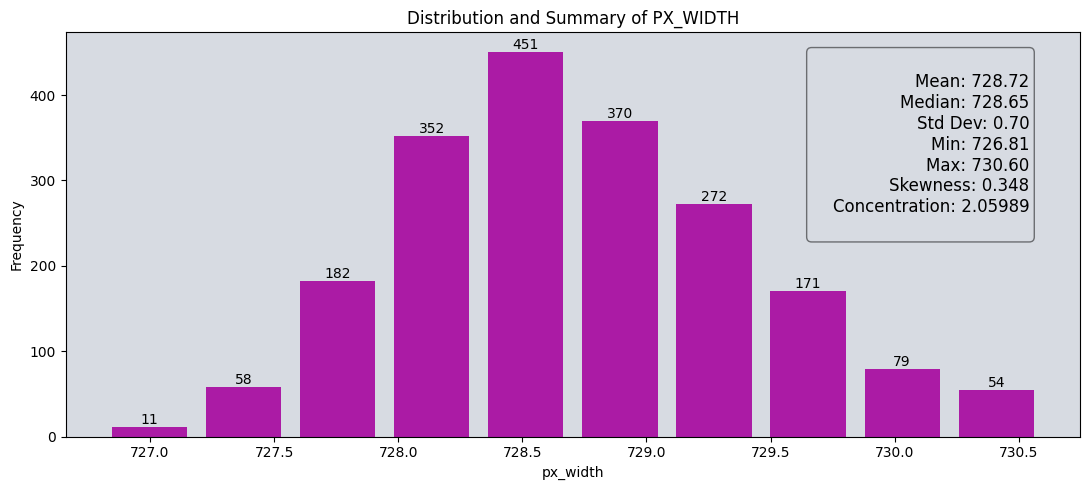

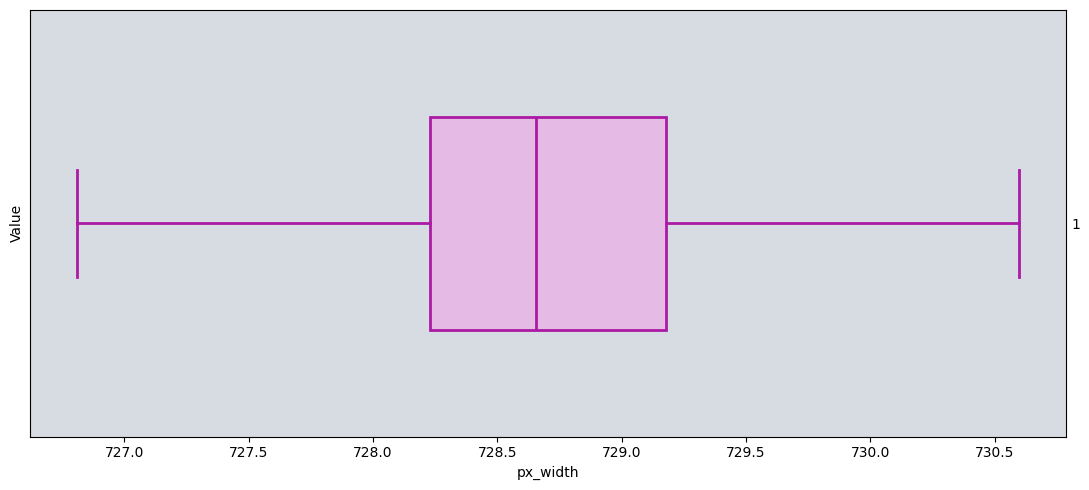

In [107]:
generate_plot(dataHeader[5])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *px Width* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Rendah: <br/>
Dapat dilihat bahwa terdapat variasi data yang rendah di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) lumayan sempit, menunjukkan bahwa titik data tersebar berdekatan dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup rendah, yang menandakan bahwa data memiliki penyebaran yang terfokus di sekitar mean.

2. Distribusi Sedikit Cenderung Homogen:<br/>
Meskipun terdapat variasi yang besar, titik data terfokus di sekitar mean atau distribusi homogen. Ini menunjukkan bahwa data memiliki konsentrasi yang tinggi pada nilai tertentu. Distribusi yang terfokus ini mengindikasikan bahwa ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu, menunjukkan bahwa sebagian besar ponsel memiliki ukuran lebar pixel yang serupa.

3. Skewness Cenderung Simetris
Skewness yang ditunjukkan oleh data adalah cenderung simetris, di mana distribusi data memiliki kecenderungan pada sisi kanan (positif skew), namun kecenderungan tersebut kecil. Ini bisa disimpulkan bahwa distribusi data tersebut cenderung simetris. Distribusi yang hampir simetris menunjukkan bahwa median dan mean data tidak terlalu berbeda, yang mengindikasikan tidak adanya outlier yang signifikan atau pergeseran yang ekstrem pada salah satu sisi distribusi.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa px Width atau lebar pixel pada ponsel menunjukkan variasi yang rendah dan distribusi yang sedikit cenderung homogen. Hal ini mengindikasikan bahwa sebagian besar ponsel memiliki ukuran lebar pixel yang serupa dan tidak terlalu berbeda secara signifikan. Distribusi yang cenderung simetris menunjukkan bahwa tidak ada pola ukuran pixel yang signifikan yang menonjol di antara ponsel-ponsel tersebut, yang bisa mengindikasikan bahwa ukuran pixel tertentu telah menjadi standar atau bahwa variasi ukuran pixel tidak terlalu memengaruhi kinerja atau tampilan visual pada ponsel.

<h3 style='text-align:center; text-transform: uppercase'> px height </h3>

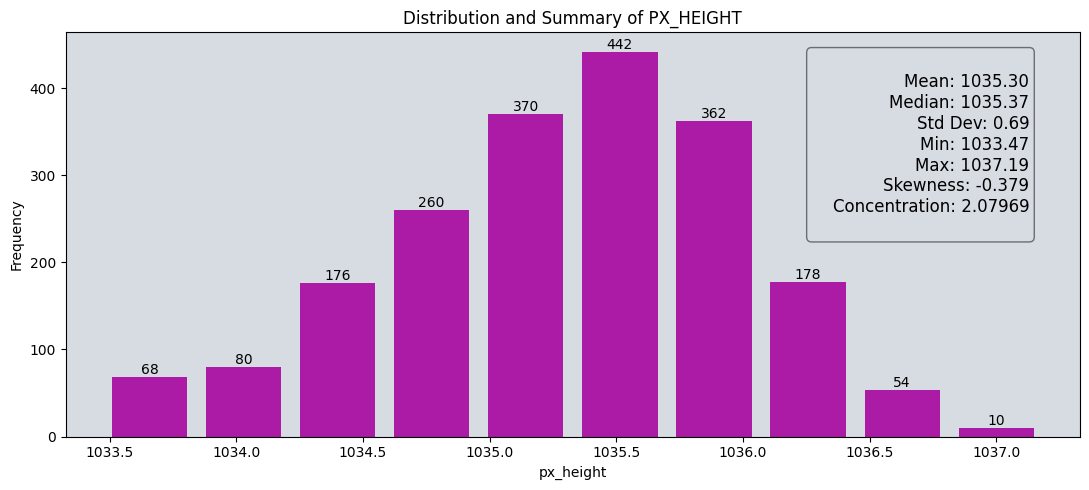

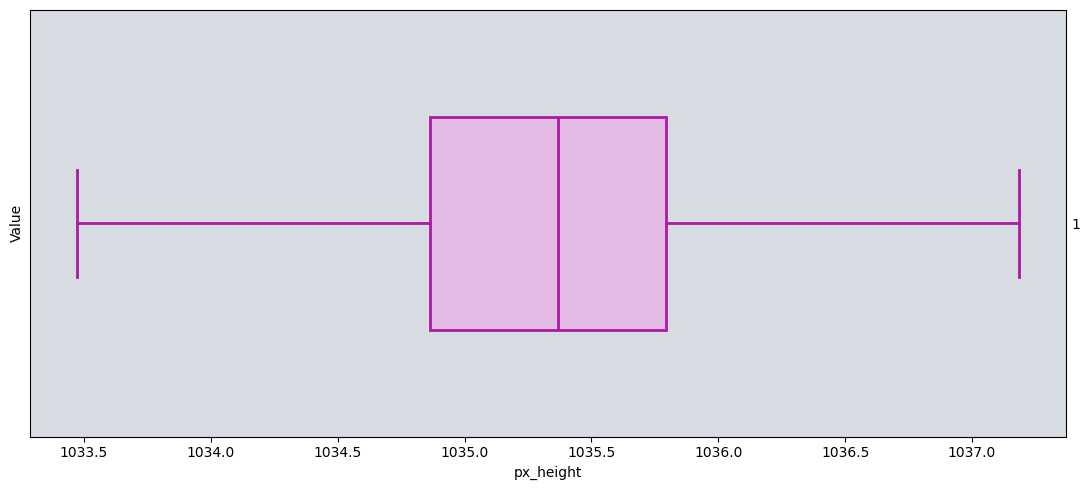

In [108]:
generate_plot(dataHeader[6])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *px height* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Rendah: <br/>
Dapat dilihat bahwa terdapat variasi data yang rendah di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) lumayan sempit, menunjukkan bahwa titik data tersebar berdekatan dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup rendah, yang menandakan bahwa data memiliki penyebaran yang terfokus di sekitar mean.

2. Distribusi Sedikit Cenderung Homogen:<br/>
Meskipun terdapat variasi yang besar, titik data terfokus di sekitar mean atau distribusi homogen. Ini menunjukkan bahwa data memiliki konsentrasi yang tinggi pada nilai tertentu. Distribusi yang terfokus ini mengindikasikan bahwa ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu, menunjukkan bahwa sebagian besar ponsel memiliki ukuran tinggi pixel yang serupa.

3. Skewness Cenderung Simetris
Skewness yang ditunjukkan oleh data adalah cenderung simetris, di mana distribusi data memiliki kecenderungan pada sisi kiri (negatif skew), namun kecenderungan tersebut kecil. Ini bisa disimpulkan bahwa distribusi data tersebut cenderung simetris. Distribusi yang hampir simetris menunjukkan bahwa median dan mean data tidak terlalu berbeda, yang mengindikasikan tidak adanya outlier yang signifikan atau pergeseran yang ekstrem pada salah satu sisi distribusi.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa px height atau tinggi pixel pada ponsel menunjukkan variasi yang rendah dan distribusi yang sedikit cenderung homogen. Hal ini mengindikasikan bahwa sebagian besar ponsel memiliki ukuran tinggi pixel yang serupa dan tidak terlalu berbeda secara signifikan. Distribusi yang cenderung simetris menunjukkan bahwa tidak ada pola ukuran pixel yang signifikan yang menonjol di antara ponsel-ponsel tersebut, yang bisa mengindikasikan bahwa ukuran pixel tertentu telah menjadi standar atau bahwa variasi ukuran pixel tidak terlalu memengaruhi kinerja atau tampilan visual pada ponsel.

<h3 style='text-align:center; text-transform: uppercase'> brand </h3>

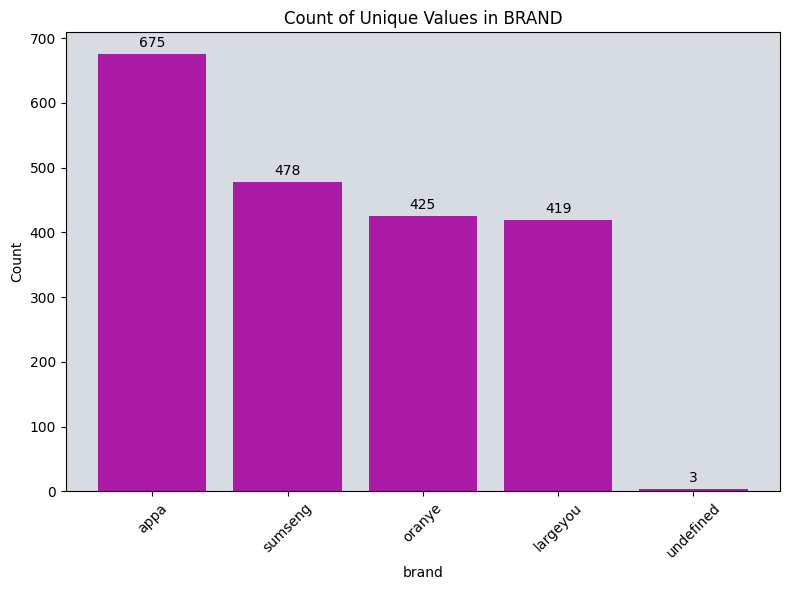

In [109]:
generate_plot(dataHeader[7])

Dari histogram string yang dihasilkan, terlihat bahwa ada kecenderungan yang cukup menarik dari pengguna untuk memilih brand "appa" sebagai produk pilihan mereka. Data menunjukkan bahwa brand "appa" mendominasi dalam frekuensi penggunaannya dibandingkan dengan brand yang lain. Hal ini mengindikasikan adanya tingkat ketertarikan yang lebih besar terhadap brand "appa" dibandingkan dengan brand lainnya.

Selain itu, dilihat dari plot, konsentrasi frekuensi data untuk brand lainnya cenderung mirip dan tidak jauh berbeda satu sama lain. Ini menunjukkan bahwa preferensi pengguna untuk brand-brand tersebut relatif seimbang dan tidak ada yang secara signifikan mendominasi selain brand "appa".

Namun, terdapat anomali dalam data yang perlu diperhatikan, yaitu adanya nilai "undefined" dalam data. Meskipun frekuensinya sangat sedikit, keberadaan nilai ini dapat menjadi indikasi adanya brand enemy lain selain dari brand utama yang appa, sumseng, oranye, dan largeyou.

<h3 style='text-align:center; text-transform: uppercase'> 5g </h3>

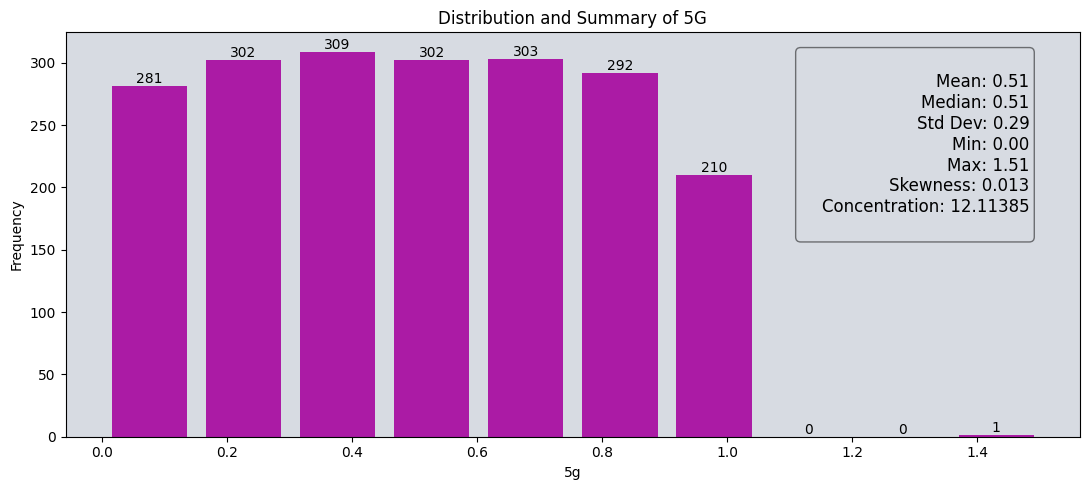

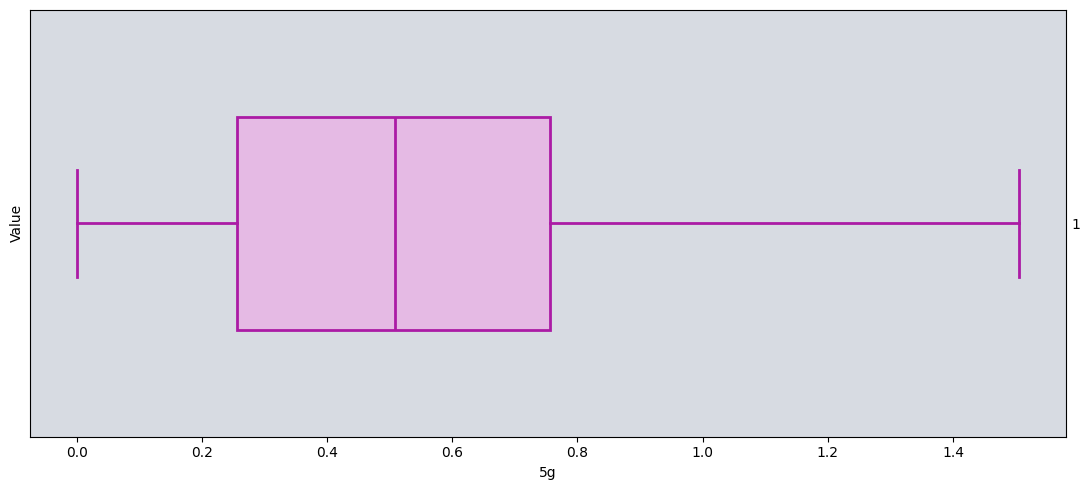

In [110]:
generate_plot(dataHeader[8])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *5G* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Rendah: <br/>
Dapat dilihat bahwa terdapat variasi data yang rendah di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) lumayan sempit, menunjukkan bahwa titik data tersebar berdekatan dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup rendah, yang menandakan bahwa data memiliki penyebaran yang terfokus di sekitar mean.

2. Distribusi yang Homogen:<br/>
Meskipun terdapat variasi yang besar, titik data terfokus di sekitar mean atau distribusi homogen. Ini menunjukkan bahwa data memiliki konsentrasi yang tinggi pada nilai tertentu. Distribusi yang terfokus ini mengindikasikan bahwa ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu, menunjukkan bahwa sebagian besar ponsel memiliki 5G connection yang serupa. Namun perlu diperhatikan bahwa mean berada cenderung di kiri yang berarti koneksi 5G masih sedikit yang memiliki speed yang baik, sedangkan sedikit sekali yang dikanan yang berarti koneksi 5G yang baik masih jarang digunakan.

3. Skewness Cenderung Simetris
Skewness yang ditunjukkan oleh data adalah cenderung simetris, di mana distribusi data memiliki kecenderungan pada sisi kanan (negatif positif), namun kecenderungan tersebut kecil. Ini bisa disimpulkan bahwa distribusi data tersebut cenderung simetris. Distribusi yang hampir simetris menunjukkan bahwa median dan mean data tidak terlalu berbeda, yang mengindikasikan tidak adanya outlier yang signifikan atau pergeseran yang ekstrem pada salah satu sisi distribusi.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa koneksi 5G pada ponsel menunjukkan variasi yang rendah dan distribusi yang cenderung homogen. Hal ini mengindikasikan bahwa sebagian besar ponsel memiliki 5G connection yang serupa, meskipun masih sedikit yang menggunakannya secara umum. Distribusi yang cenderung simetris juga menunjukkan bahwa koneksi 5G tidak memiliki pola penggunaan yang signifikan yang menonjol di antara ponsel-ponsel tersebut, yang bisa mengindikasikan bahwa ketersediaan koneksi 5G secara merata di pasar ponsel.

<h3 style='text-align:center; text-transform: uppercase'> grade </h3>

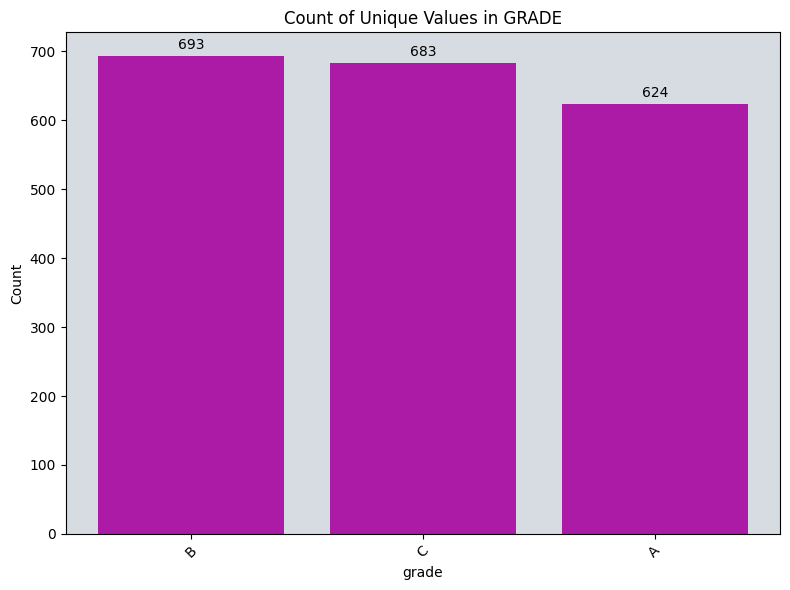

In [111]:
generate_plot(dataHeader[9])

Dari plot histogram tersebut dapatdilihat bahwa kebanyak produk phone memiliki grade B dimana merupakan grade tengah, dengan grade A paling sedikit disusul dengan grade C, Namun perbedaan tersebut tidak terlalu signifikan jumlahnyaDari plot histogram yang menunjukkan distribusi grade produk phone, dapat disimpulkan bahwa sebagian besar produk memiliki grade B, yang merupakan grade tengah. Grade A memiliki jumlah paling sedikit, diikuti oleh grade C. Meskipun demikian, perbedaan jumlah antara grade A, B, dan C tidak terlalu signifikan.

Analisis ini menunjukkan bahwa mayoritas produk memiliki kualitas yang dapat dianggap sebagai rata-rata atau tengah (grade B), sedangkan produk dengan kualitas terbaik (grade A) memiliki frekuensi yang lebih rendah. Selain itu, jumlah produk dengan kualitas di bawah rata-rata (grade C) juga cukup terwakili meskipun tidak sebanyak grade B.

Hal ini dapat memberikan gambaran bahwa mayoritas produk phone dalam dataset memiliki kualitas yang relatif serupa dan tidak ada perbedaan yang mencolok dalam distribusi kualitas produk. 

<h3 style='text-align:center; text-transform: uppercase'> price </h3>

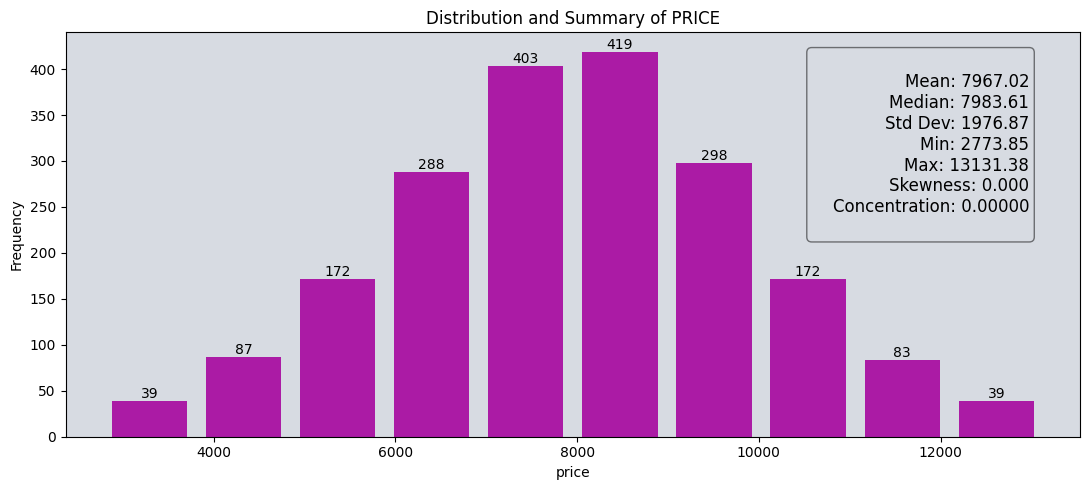

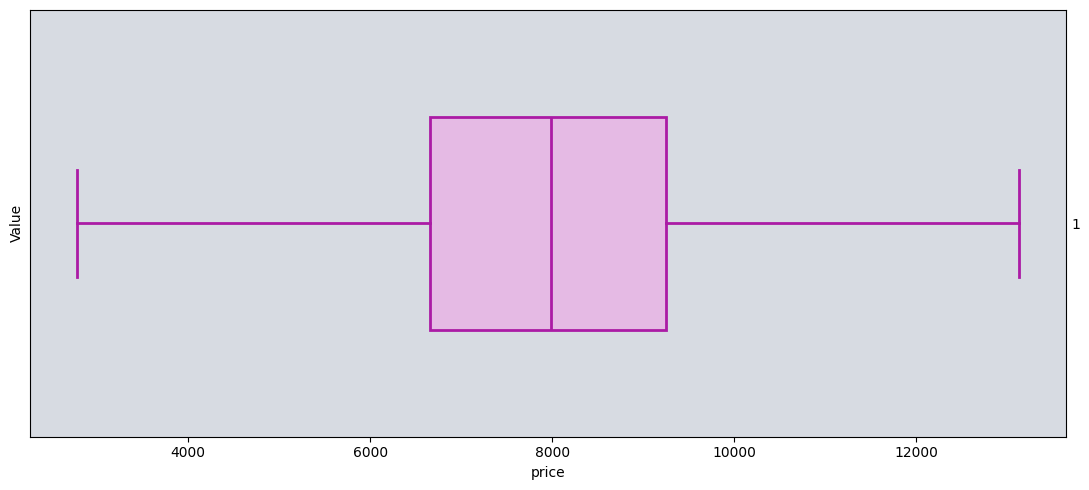

In [112]:
generate_plot(dataHeader[10])

Berdasarkan analisis histogram dan box plot, dapat disimpulkan bahwa data *Price* menunjukkan beberapa karakteristik berikut:

1. Variasi Data yang Besar: <br/>
Dapat dilihat bahwa terdapat variasi data yang besar di antara titik data dalam sampel tersebut. Hal ini ditunjukkan pada box plot di mana rentang antar kuartil (IQR) sangat luas, menunjukkan bahwa titik data tersebar cukup jauh dari nilai rata-rata. Hal ini diperkuat dengan standar deviasi yang cukup tinggi, yang menandakan bahwa data memiliki penyebaran yang besar di sekitar mean.

2. Distribusi yang Heterogen:<br/>
Meskipun terdapat variasi yang besar, titik data tersebar merata atau terdistribusi secara heterogen. Ini menunjukkan bahwa tidak ada konsentrasi yang tinggi pada nilai tertentu, melainkan data tersebar secara luas dan relatif merata di seluruh rentang nilai yang ada. Distribusi yang merata ini mengindikasikan bahwa tidak ada banyak pengelompokan atau clustering data pada nilai-nilai tertentu.

3. Skewness Simetris
Skewness yang ditunjukkan oleh data adalah simetris, di mana distribusi data tidak memiliki kecenderungan pada sisi manapun.

4. Makna dari Representasi: <br/>
Makna dari representasi tersebut adalah bahwa koneksi Price pada ponsel menunjukkan variasi yang besar dan distribusi yang heterogen. Meskipun variasinya besar, data terdistribusi secara merata tanpa adanya konsentrasi yang signifikan pada nilai-nilai tertentu. Distribusi yang simetris menunjukkan bahwa tidak ada preferensi yang kuat terhadap rentang harga tertentu, yang dapat menggambarkan pasar yang beragam dengan harga yang berbeda-beda untuk produk ponsel.

### Setup Library untuk evaluasi jenis distribusi

In [113]:
from scipy import stats
from scipy.stats import kstest, gamma, beta, chi2, binom, f

## Problem 4
#### Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?



In [114]:
def distribution_test(col):
    stat, p_val = stats.normaltest(df[col])
    display(Markdown("### D’Agostino’s K-squared Test, $p$ = $%.10f$" % (p_val)))
    
    if p_val > 0.05:
        display(Markdown("### Kolom %s Berdistribusi Normal" % (col)))
    else:
        # Logika tambahan untuk mengecek distribusi lain jika tidak normal
        log_data = np.log(df[col][df[col] > 0])
        
        # Tes distribusi dengan Goodness of Fit Test (Kolmogorov-Smirnov Test)
        tests = {
            "Log-Normal": kstest(log_data, 'norm'),
            "Eksponensial": kstest(df[col], 'expon', args=(df[col].min(), df[col].mean())),
            "Gamma": kstest(df[col], 'gamma', args=(1, 0, df[col].mean())),
            "Beta": kstest(df[col], 'beta', args=(2, 5, df[col].min(), df[col].max())),
            "Chi-Squared": kstest(df[col], 'chi2', args=(2,)),
            "Binomial": kstest(df[col], 'binom', args=(len(df[col]), df[col].mean()/df[col].max())),
            "F-Distribution": kstest(df[col], 'f', args=(2, df[col].mean()))
        }

        distribution_type = "Tidak Diketahui"
        max_p_val = 0

        for dist, (stat, p) in tests.items():
            if p > max_p_val:
                max_p_val = p
                distribution_type = dist
        
        display(Markdown("### Kolom %s Berdistribusi Tidak Normal" % (col)))
        display(Markdown("### Distribusi yang mungkin: %s" % distribution_type))
    
    plt.subplots()
    df[col].plot(kind="hist", color="#ab1ba5", linewidth=1.9, edgecolor="#550d52", bins=10, density=True).set_facecolor('#c6ccd6')
    df[col].plot(kind="kde", color="#220521", linewidth=2, figsize=(12, 6))
    plt.title(col)
    plt.show()

# Contoh penggunaan:
# df = pd.read_csv('data.csv') # Pastikan untuk memuat data terlebih dahulu
# distribution_test('nama_kolom')


### Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.
Untuk melakukan normality test untuk setiap kolom numerik, digunakan fungsi `normaltest` dari library scipy. Normality test ini didasarkan oleh `D'Agostino` dan `Pearson's` test yang mengombinasikan skewness dan kurtosis untuk mengukur normality suatu data. Hipotesis null ($H_0$) dari test ini berasal dari data yang terdistribusi normal. 

Tingkat Signifikan $\alpha = 0.05$ <br>
**KEPUTUSAN : Tolak $H_0$ jika $p < \alpha$**

### D’Agostino’s K-squared Test, $p$ = $0.8270159531$

### Kolom battery_power Berdistribusi Normal

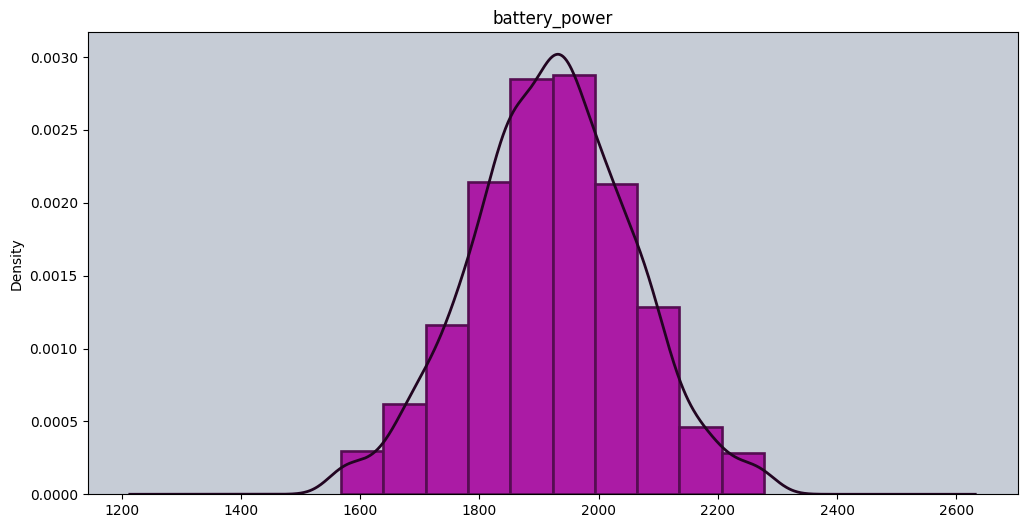

In [115]:
distribution_test(dataHeader[0])

### D’Agostino’s K-squared Test, $p$ = $0.4992640807$

### Kolom clock_speed Berdistribusi Normal

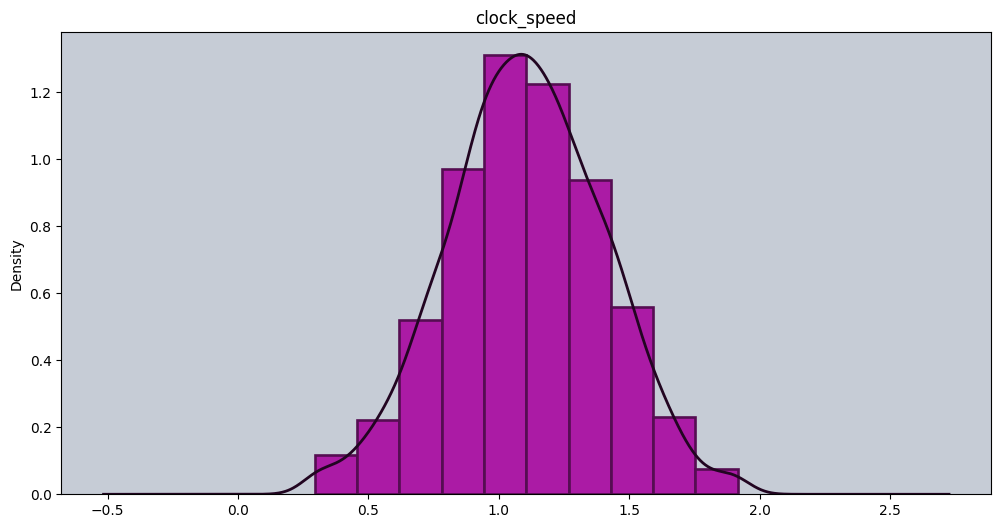

In [116]:
distribution_test(dataHeader[1])

### D’Agostino’s K-squared Test, $p$ = $0.0603904050$

### Kolom ram Berdistribusi Normal

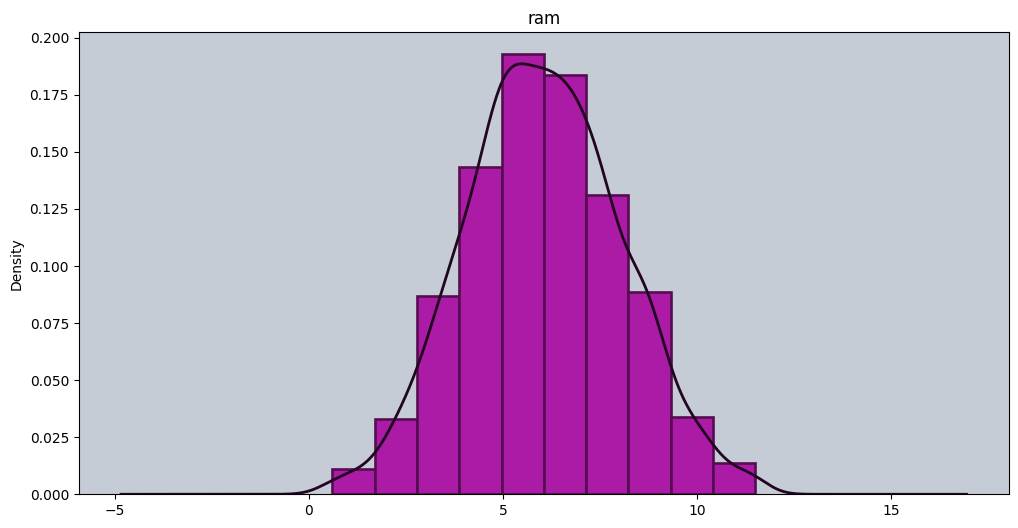

In [117]:
distribution_test(dataHeader[2])

### D’Agostino’s K-squared Test, $p$ = $0.0845878751$

### Kolom n_cores Berdistribusi Normal

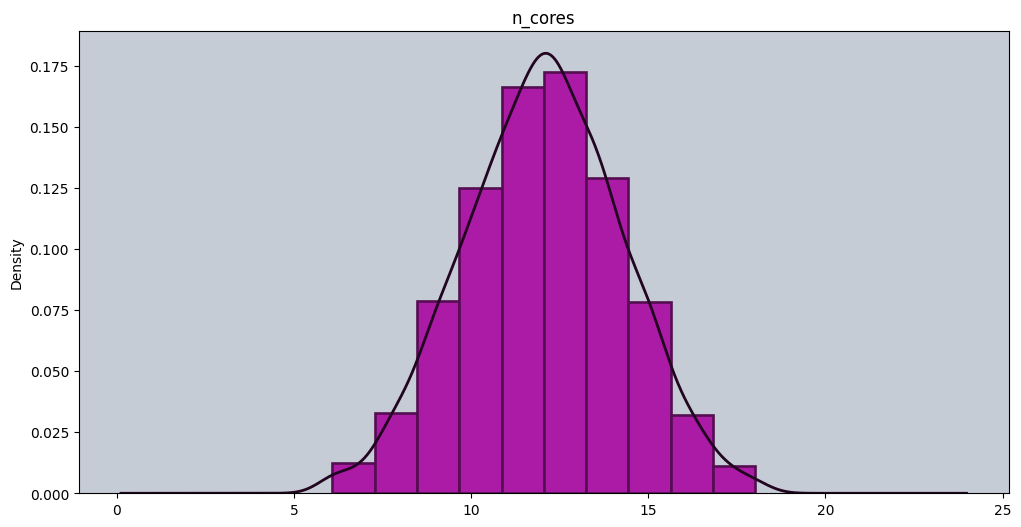

In [118]:
distribution_test(dataHeader[3])

### D’Agostino’s K-squared Test, $p$ = $0.2174759863$

### Kolom use_time Berdistribusi Normal

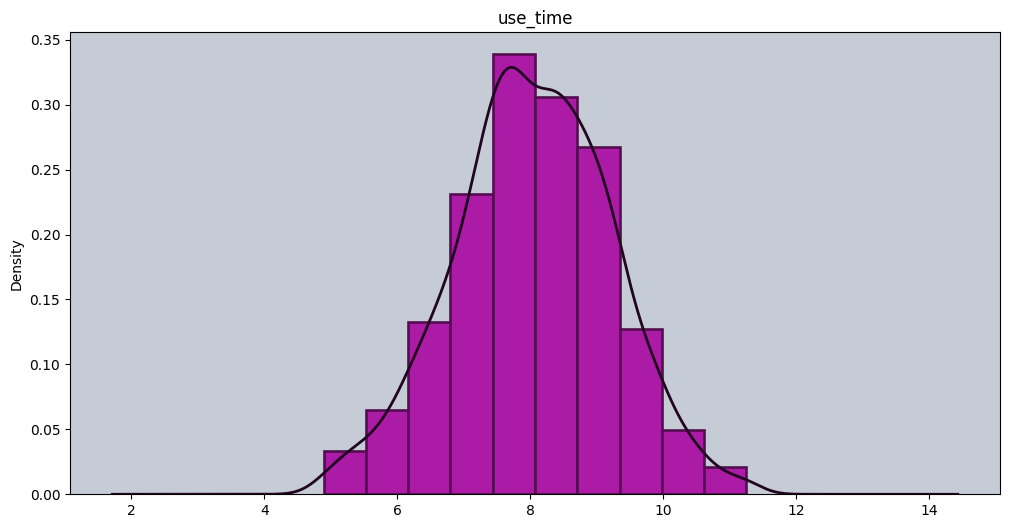

In [119]:
distribution_test(dataHeader[4])

### D’Agostino’s K-squared Test, $p$ = $0.0000000021$

### Kolom px_width Berdistribusi Tidak Normal

### Distribusi yang mungkin: Tidak Diketahui

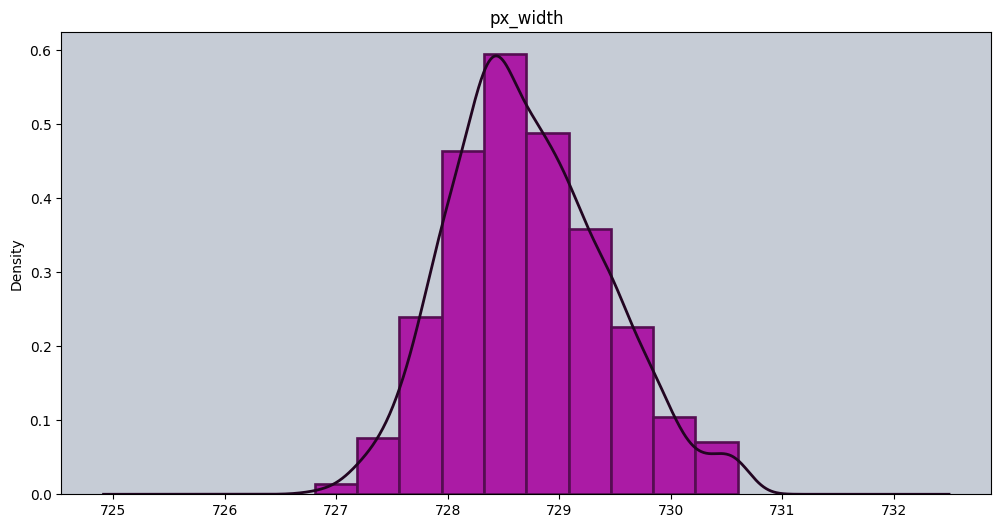

In [120]:
distribution_test(dataHeader[5])

### D’Agostino’s K-squared Test, $p$ = $0.0000000001$

### Kolom px_height Berdistribusi Tidak Normal

### Distribusi yang mungkin: Tidak Diketahui

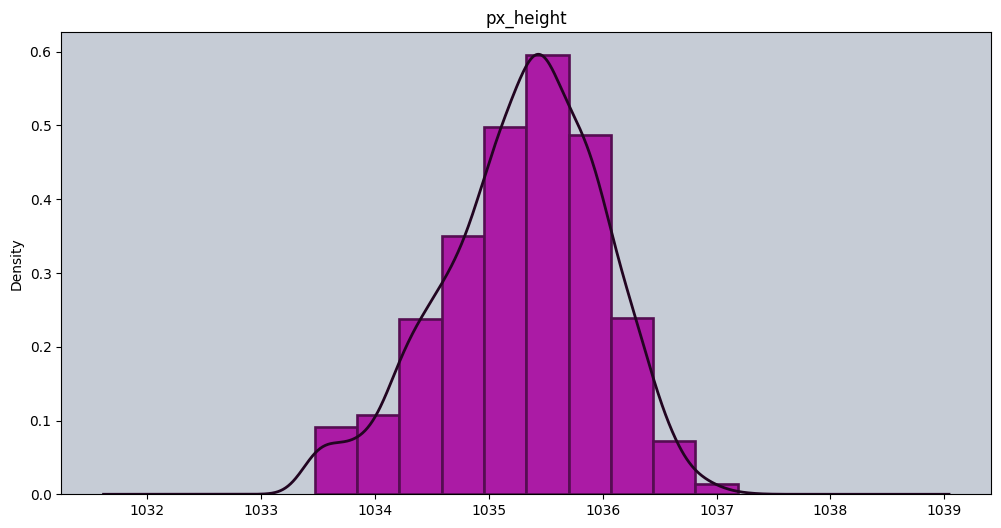

In [121]:
distribution_test(dataHeader[6])

### D’Agostino’s K-squared Test, $p$ = $0.0000000000$

### Kolom 5g Berdistribusi Tidak Normal

### Distribusi yang mungkin: Eksponensial

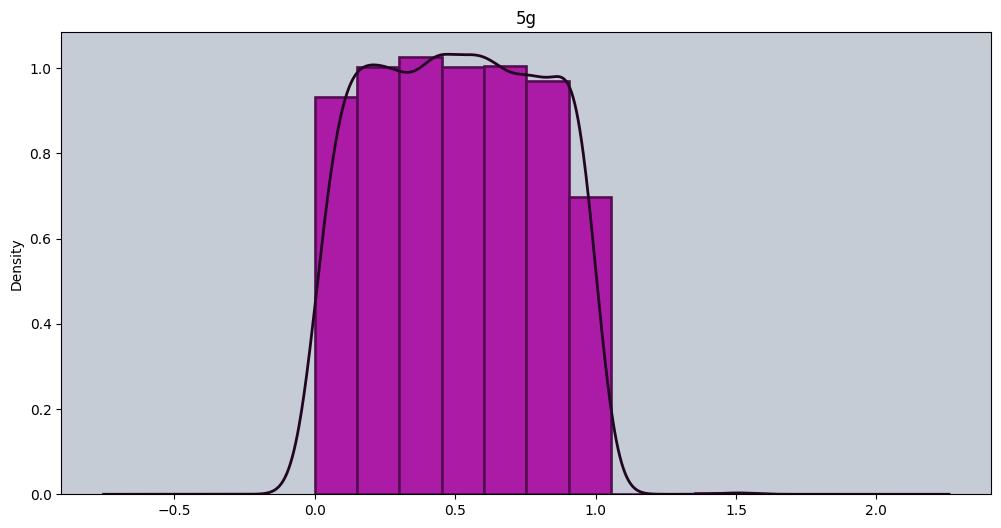

In [122]:
distribution_test(dataHeader[8])

### D’Agostino’s K-squared Test, $p$ = $0.3826797498$

### Kolom price Berdistribusi Normal

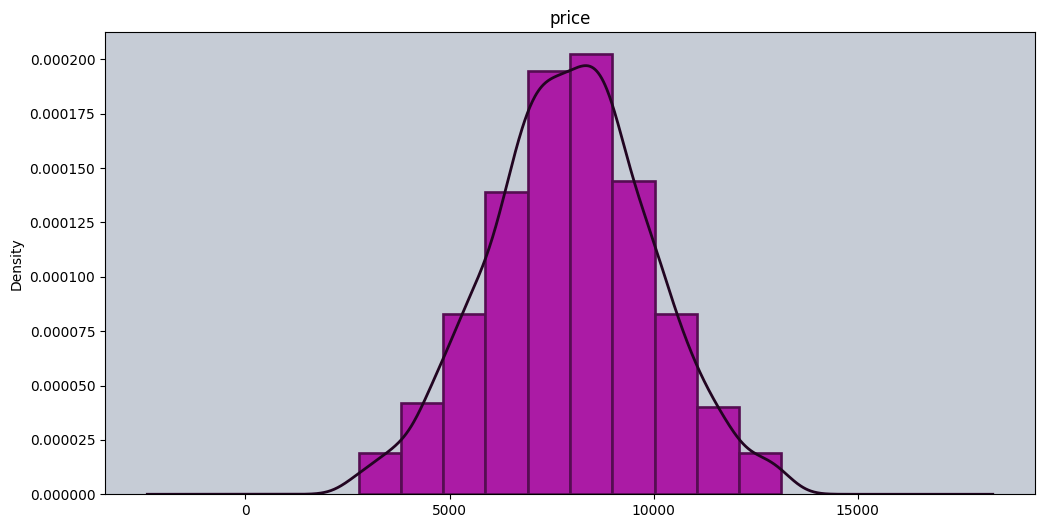

In [123]:
distribution_test(dataHeader[10])

In [124]:
import scipy.stats as scp
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

## Problem 5
#### Hipotesis 1 Sampel

In [125]:
def plot_problem5(col, df_data):
    mean = df_data[col].mean()
    plt.figure(figsize=(12, 6))
    df_data[col].plot(kind="box")
    plt.axhline(mean, color='r', linestyle='--', label=f'Mean: {round(mean, 4)}')
    plt.text(x=1.05, y=mean, s=f'{round(mean, 4)}', color='r', verticalalignment='center')
    plt.title(col)
    plt.legend()
    plt.show()

In [126]:
def calculate_z(attribute,value):
    # manual calculation

    mean = df[attribute].mean()
    standard_deviation = df[attribute].std()
    
    z = (mean - value) / (standard_deviation / np.sqrt(len(df[attribute])))
    return z

def calculate_p_value(z, alternative):
    # manual calculation
    if alternative == "two_tailed":
        p = scp.norm.sf(abs(z))*2
    else:
        p = scp.norm.sf(z)
    return p

### a. Testimoni dari pengguna banyak yang menyatakan bahwa kapasitas baterai yang digunakan kurang dari sewajarnya. Periksa apakah battery_power memiliki rata-rata di atas 1800?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Nilai rata rata battery_power sama dengan $1800$ ($\mu = 1800$)  

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Nilai rata rata battery power lebih dari $1800$ ($\mu > 1800$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **One Tailed Mean Test** <br>
Critical section: $z > z_\alpha$ : $z > z_{0.05}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}} $$

Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika $z > z_\alpha$ dan $p < \alpha$**

Perhitungan Manual
Nilai z : 40.20813621087458
Nilai p : 0.0



**Hasil Perhitungan Uji Hipotesis**

**Nilai z:** 40.2081

**Nilai z_alpha:** 1.6449

**Nilai P:** 0.0

**Keputusan:**
H0 ditolak: Rata-rata harga baterai ponsel tidak sama dengan 1800

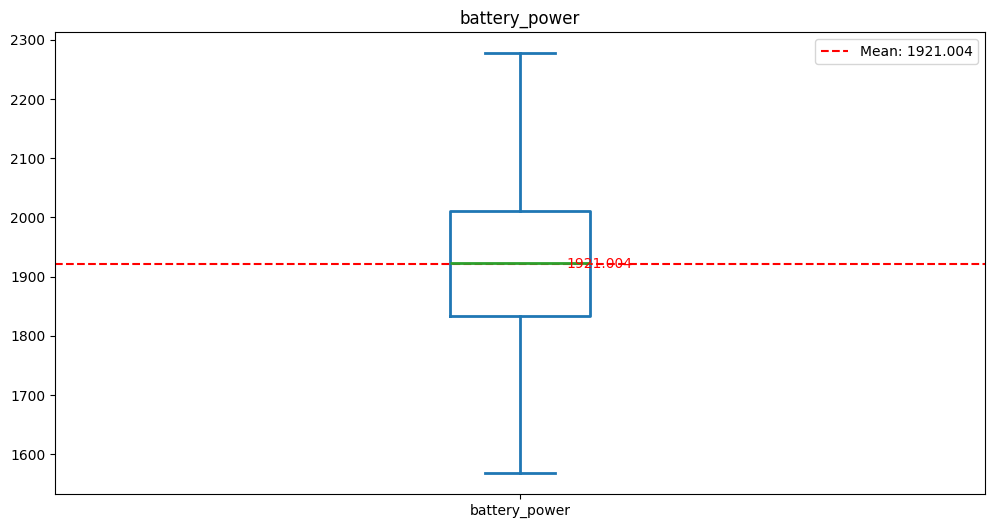

In [127]:



z, p = ztest(df["battery_power"], value=1800)

z_alpha = scp.norm.ppf(1 - 0.05)

markdown_output = f"""
**Hasil Perhitungan Uji Hipotesis**

**Nilai z:** {round(z, 4)}

**Nilai z_alpha:** {round(z_alpha, 4)}

**Nilai P:** {p}

**Keputusan:**
"""
print("Perhitungan Manual")
z_manual = calculate_z("battery_power", 1800)
p_manual = calculate_p_value(z_manual, "one_tailed")
print("Nilai z :", z_manual)
print("Nilai p :", p_manual)

if (z > z_alpha and p < 0.05):
    keputusan = "H0 ditolak: Rata-rata harga baterai ponsel tidak sama dengan 1800"
else:
    keputusan = "Gagal menolak H0: Rata-rata harga baterai ponsel sama dengan 1800"

markdown_output += keputusan
display(Markdown(markdown_output))

plot_problem5("battery_power", df)

### b. Standar RAM yang dimiliki oleh suatu smartphone sekarang adalah 8 GB. Periksalah apakah rata-rata ram smartphone pada dataset adalah 8 GB?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Nilai rata rata RAM sama dengan $8$ gb ($\mu = 8$)  

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Nilai rata rata RAM lebih dari $8$ gb ($\mu \ne 8$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Mean Test** <br>
Critical section: $z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$  : $z > z_{0.025}$ atau $z < -z_{0.025}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}} $$

Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika $z > z_\alpha$ dan $p < \alpha$**

Perhitungan Manual
Nilai z : -43.56464065510088
Nilai p : 0.0



**Hasil Perhitungan Uji Hipotesis**

**Nilai z:** -43.5646

**Nilai z_alpha:** 1.96

**Nilai P:** 0.0

**Keputusan:**
H0 ditolak: Rata-rata ram ponsel tidak sama dengan 8

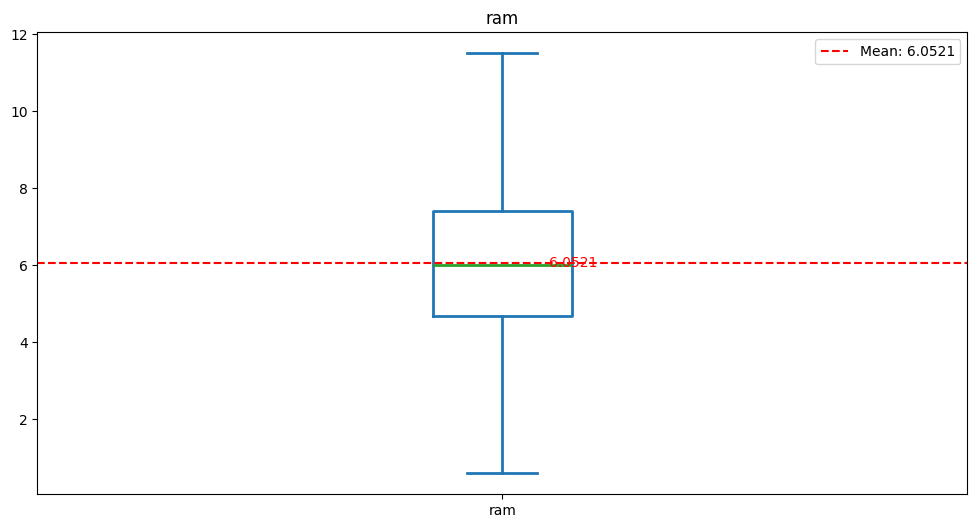

In [128]:
alpha = 0.05

z, p = ztest(df["ram"], value=8)

z_alpha = scp.norm.ppf(1 - alpha/2)

markdown_output = f"""
**Hasil Perhitungan Uji Hipotesis**

**Nilai z:** {round(z, 4)}

**Nilai z_alpha:** {round(z_alpha, 4)}

**Nilai P:** {p}

**Keputusan:**
"""

print("Perhitungan Manual")
z_manual = calculate_z("ram", 8)
p_manual = calculate_p_value(z_manual, "two_tailed")
print("Nilai z :", z_manual)
print("Nilai p :", p_manual)

if ((z>z_alpha or z < -z_alpha) and p<alpha):
    keputusan = "H0 ditolak: Rata-rata ram ponsel tidak sama dengan 8"
else:
    keputusan = "Gagal menolak H0: Rata-rata ram ponsel sama dengan 8"

markdown_output += keputusan
display(Markdown(markdown_output))

plot_problem5("ram", df)

### c. Periksa apakah 250 data pertama pada dataset memiliki rata-rata kecepatan clocking (clock_speed) tidak sama dengan 1!

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Nilai rata rata 250 baris pertama kolom clock_speed sama dengan $1$ ($\mu = 1$)  

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Nilai rata rata 250 baris pertama kolom clock_speed tidak sama dengan dari $1$ ($\mu \ne 1$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Mean Test** <br>
Critical section: $z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$  : $z > z_{0.025}$ atau $z < -z_{0.025}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}} $$

Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika $(z > z_{\alpha/2}$ atau $z < -z_{\alpha/2})$ dan $p < \alpha$**

Perhitungan Manual
Nilai z : 4.309313409009289
Nilai p : 1.6376215820362548e-05



**Hasil Perhitungan Uji Hipotesis**

**Nilai z:** 4.3093

**Nilai z_alpha:** 1.96

**Nilai P:** 1.6376215820362453e-05

**Keputusan:**
H0 ditolak: Rata-rata clock speed ponsel tidak sama dengan 1

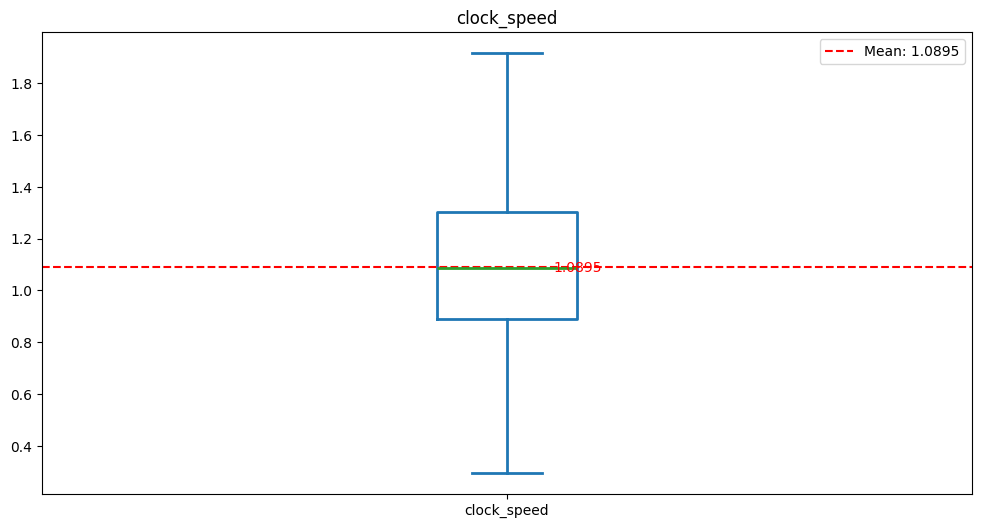

In [129]:
alpha = 0.05
z, p = ztest(df["clock_speed"].head(250), value = 1)


z_alpha = scp.norm.ppf(1-alpha/2)

markdown_output = f"""
**Hasil Perhitungan Uji Hipotesis**

**Nilai z:** {round(z, 4)}

**Nilai z_alpha:** {round(z_alpha, 4)}

**Nilai P:** {p}

**Keputusan:**
"""

data = df["clock_speed"][:250]
mean = data.mean()
std = data.std()
n = len(data)
# print(std)
print("Perhitungan Manual")
z_manual = (mean - 1) / (std / np.sqrt(n))
p_manual = calculate_p_value(z_manual, "two_tailed")
print("Nilai z :", z_manual)
print("Nilai p :", p_manual)


if ((z>z_alpha or z < -z_alpha) and p<alpha):
    keputusan = "H0 ditolak: Rata-rata clock speed ponsel tidak sama dengan 1"
else:
    keputusan = "Gagal menolak H0: Rata-rata clock speed ponsel sama dengan 1"

markdown_output += keputusan
display(Markdown(markdown_output))

plot_problem5("clock_speed", df[:250])

### d. Periksa apakah data smartphone dengan merek "appa" yang memiliki rata-rata waktu penggunaan (use_time) lebih dari 8.5 tidak sama dengan 35% dari data keseluruhan?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Proporsi data smartphone merek "appa" dengan use_time lebih dari 8.5 jam sama dengan 35% dari data keseluruhan ($p = 0.35$).

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Proporsi data smartphone merek "appa" dengan use_time lebih dari 8.5 jam tidak sama dengan 35% dari data keseluruhan ($p \neq 0.35$).

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Uji Variabel Binomial X dengan $p$ = $p_0$** <br>
Critical section: $z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$  : $z > z_{0.025}$ atau $z < -z_{0.025}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{\hat{p} - p_0}{\sqrt{p_0q_0/n}} $$

Hitung nilai P dari x (jumlah sukses)

**6. KEPUTUSAN : Tolak $H_0$ jika $(z > z_{\alpha/2}$ atau $z < -z_{\alpha/2})$ dan $p < \alpha$**


**Hasil Perhitungan Uji Hipotesis**

**Nilai z:** -26.2063

**Nilai z_alpha:** 1.96

**Nilai P:** 2.2510388355056196e-151

**Keputusan:**
H0 ditolak: Proporsi merek ponsel appa dengan usetime > 8.5 tidak sama dengan 0.35

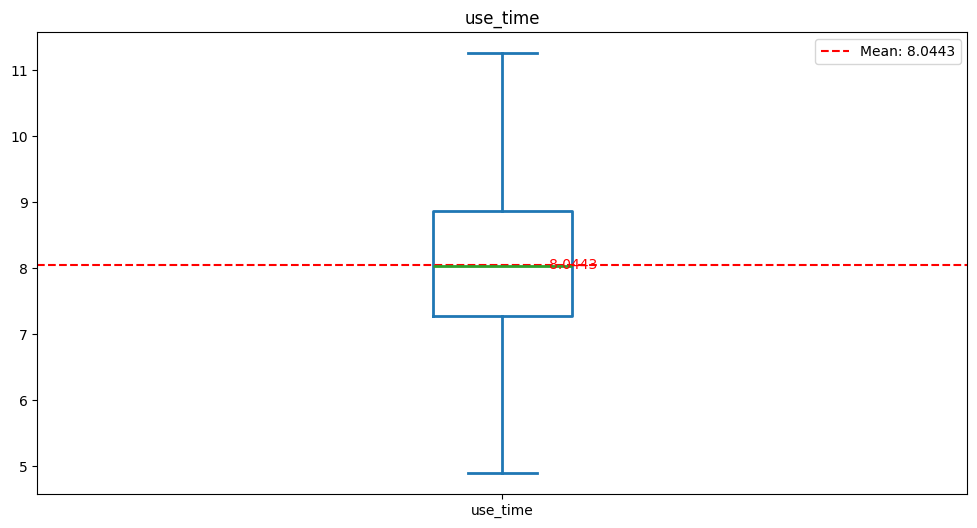

In [130]:
import math

n_sample = len(df[(df["brand"] == "appa") & (df["use_time"] > 8.5)])
n_total = len(df["brand"])
p1 = n_sample / n_total

p0 = 0.35

q0 = 1 - p0

z = (p1 - p0) / math.sqrt((p0 * q0) / n_total)

alpha = 0.05

z_alpha = scp.norm.ppf(1 - alpha / 2)

# Hitung nilai p
p = scp.norm.sf(abs(z)) * 2



markdown_output = f"""
**Hasil Perhitungan Uji Hipotesis**

**Nilai z:** {round(z, 4)}

**Nilai z_alpha:** {round(z_alpha, 4)}

**Nilai P:** {p}

**Keputusan:**
"""

if ((z > z_alpha or z < -z_alpha) and p < 0.05):
    keputusan = "H0 ditolak: Proporsi merek ponsel appa dengan usetime > 8.5 tidak sama dengan 0.35"
else:
    keputusan = "Gagal menolak H0: Proporsi merek ponsel appa dengan usetime > 8.5 sama dengan 0.35"

markdown_output += keputusan
display(Markdown(markdown_output))

plot_problem5("use_time", df)

## Problem 6
#### Hipotesis 2 Sampel

In [131]:
def plot_solution_test(df_column_head, df_column_tail, column_name):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.boxplot(df_column_head, vert=True, showmeans=True)
    plt.title(f'{column_name} - Generasi Sebelumnya')
    plt.ylabel('Nilai')

    median_head = np.median(df_column_head)
    mean_head = np.mean(df_column_head)
    plt.axhline(median_head, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_head:.2f}')
    plt.axhline(mean_head, color='g', linestyle='-', linewidth=2, label=f'Mean: {mean_head:.2f}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.boxplot(df_column_tail, vert=True, showmeans=True)
    plt.title(f'{column_name} - Generasi Sekarang')
    plt.ylabel('Nilai')

    median_tail = np.median(df_column_tail)
    mean_tail = np.mean(df_column_tail)
    plt.axhline(median_tail, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_tail:.2f}')
    plt.axhline(mean_tail, color='g', linestyle='-', linewidth=2, label=f'Mean: {mean_tail:.2f}')
    plt.legend()

    plt.suptitle(f'Perbandingan {column_name} Antara Generasi Sebelumnya dan Sekarang')
    plt.show()


In [132]:
def calculate_z_2s(df1,df2,delta):
    mean1 = df1.mean()
    mean2 = df2.mean()
    var1 = df1.var()
    var2 = df2.var()
    z = ((mean1 - mean2) - delta)/(np.sqrt(var1/len(df1) + var2/len(df2)))
    return z

### a. Periksa apakah rata-rata jumlah core (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang?
**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Nilai rata-rata kolom jumlah core (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang ($\mu_1 - \mu_2 = 0$)

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Nilai rata-rata kolom jumlah core (n_cores) smartphone generasi sebelumnya tidak sama dengan jumlah core smartphone generasi sekarang ($\mu_1 - \mu_2 \\ne 0$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Mean Test** <br>
Critical section: $z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$ : $z > z_{0.025}$ atau $z < -z_{0.025}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{(\bar{x_1} - \bar{x_2}) - delta}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika ($z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$) dan $p < \alpha$**

perhitungan manual
Nilai z : 1.1276875601803777
Nilai p : 0.2594518931132791



### Hasil Uji Hipotesis

- **Nilai z**: 1.1277
- **Nilai z(α/2)**: 1.9600
- **Nilai p**: 0.2595



### Keputusan
**Gagal menolak Hipotesis H0**: Rata-rata (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang.

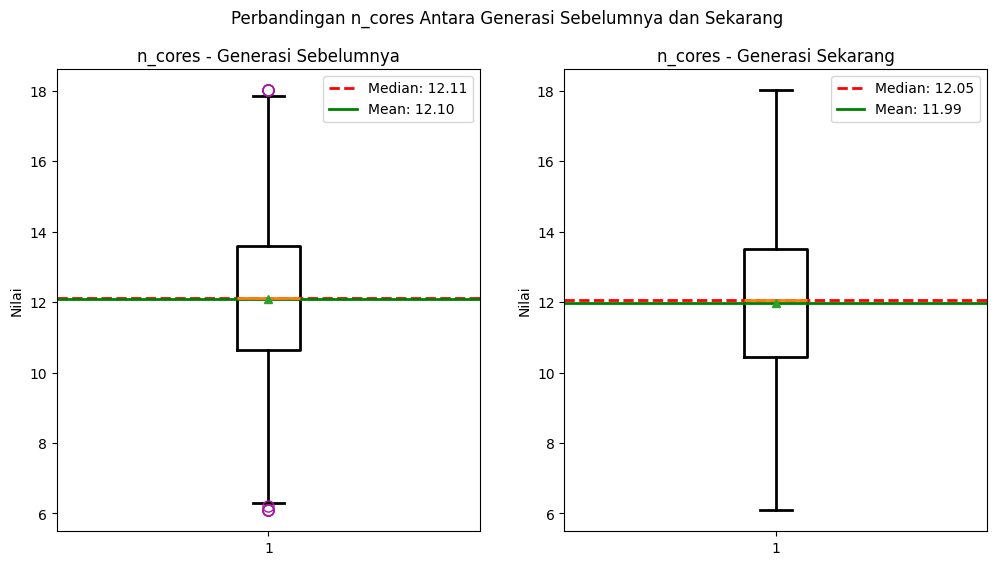

In [133]:
# Inisialisasi variabel konstanta
df_ncores = df["n_cores"]
delta = 0
alpha = 0.05

# Potong data menjadi dua bagian
df_ncores_head = df_ncores[:len(df)//2]
df_ncores_tail = df_ncores[len(df)//2:]

# Temukan nilai z dan p
z, p = ztest(df_ncores_head, df_ncores_tail, value=delta)

# Temukan nilai z(alpha/2)
z_alpha_over_2 = scp.norm.ppf(1 - alpha/2)


print("perhitungan manual")

z_manual = calculate_z_2s(df_ncores_head,df_ncores_tail,delta)
p_manual = calculate_p_value(z_manual, "two_tailed")
print("Nilai z :", z_manual)
print("Nilai p :", p_manual)

# Tampilkan hasil
display(Markdown(f"""
### Hasil Uji Hipotesis

- **Nilai z**: {z:.4f}
- **Nilai z(α/2)**: {z_alpha_over_2:.4f}
- **Nilai p**: {p:.4f}

"""))


# Hitung keputusan
if ((z > z_alpha_over_2 or z < -z_alpha_over_2) and p < alpha):
    decision = ("**Hipotesis H0 ditolak**: Rata-rata (n_cores) "
                "smartphone generasi sebelumnya tidak sama dengan jumlah core smartphone generasi sekarang.")
else:
    decision = ("**Gagal menolak Hipotesis H0**: Rata-rata (n_cores) "
                "smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang.")

display(Markdown(f"### Keputusan\n{decision}"))

# Plot setiap bagian
plot_solution_test(df_ncores_head, df_ncores_tail, "n_cores")


### b. Bagaimana dengan harga smartphone, apakah harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya ($\mu_1 - \mu_2 = -100$)

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Harga smartphone generasi sekarang tidak lebih mahal 100 dari generasi sebelumnya ($\mu_1 - \mu_2 \ne -100$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Mean Test** <br>
Critical section: $z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$ : $z > z_{0.025}$ atau $z < -z_{0.025}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{(\bar{x_1} - \bar{x_2}) - delta}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika ($z > z_{\alpha/2}$ atau $z < -z_{\alpha/2}$) dan $p < \alpha$**

perhitungan manual
Nilai z : 0.9792467369979378
Nilai p : 0.32745808080973937



### Hasil Uji Hipotesis

- **Nilai z**: 0.9792
- **Nilai z(α/2)**: 1.9600
- **Nilai p**: 0.3275



### Keputusan
**Gagal menolak Hipotesis H0**, artinya Nilai harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya.

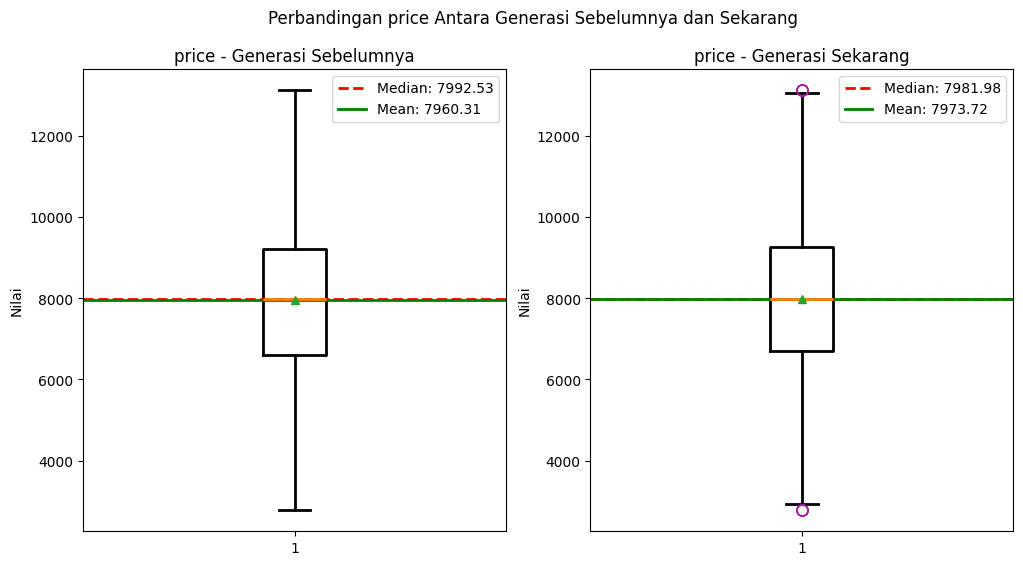

In [134]:
df_price = df["price"]
delta = -100
alpha = 0.05

df_price_head = df_price[:len(df)//2]
df_price_tail = df_price[len(df)//2:]

# find z and p value
z, p = ztest(df_price_head, df_price_tail, value=delta)

# Find z(alpha/2) value
z_alpha_over_2 = scp.norm.ppf(1-alpha/2)


print("perhitungan manual")
z_manual = calculate_z_2s(df_price_head,df_price_tail,delta)
p_manual = calculate_p_value(z_manual, "two_tailed")
print("Nilai z :", z_manual)
print("Nilai p :", p_manual)

display(Markdown(f"""
### Hasil Uji Hipotesis

- **Nilai z**: {z:.4f}
- **Nilai z(α/2)**: {z_alpha_over_2:.4f}
- **Nilai p**: {p:.4f}

"""))

# Hitung keputusan
if ((z > z_alpha_over_2 or z < -z_alpha_over_2) and p < alpha):
    decision = ("**Hipotesis H0 ditolak**, artinya Nilai harga smartphone generasi sekarang tidak lebih mahal 100 dari generasi sebelumnya.")
else:
    decision = ("**Gagal menolak Hipotesis H0**, artinya Nilai harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya.")

display(Markdown(f"### Keputusan\n{decision}"))

# Plot setiap bagian
plot_solution_test(df_price_head, df_price_tail, "price")



### c. Apakah variansi dari tinggi smartphone (px_height) sama pada kedua generasi?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Smartphone generasi lama memiliki variansi dari tinggi smartphone yang sama dengan bagian generasi baru ($\sigma^2_1 - \sigma^2_2 = 0$)

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Smartphone generasi lama tidak memiliki variansi dari tinggi smartphone yang sama dengan bagian generasi baru ($\sigma^2_1 - \sigma^2_2 \ne 0$)

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **Two Tailed Variance Test** <br>
Critical section: $f < f_{1-\alpha/2}(v_1, v_2)$ atau $f > f_{\alpha/2}(v_1, v_2)$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ f = \frac{s_1^2}{s_2^2} $$

dengan

$$ v_1 = n_1 - 1, v_2 = n_2 - 2$$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika ($f < f_{1-\alpha/2}(v_1, v_2)$ atau $f > f_{\alpha/2}(v_1, v_2)$) dan $p < \alpha$**


### Hasil Uji Hipotesis

- **Nilai f**: 1.0508
- **Nilai f upper**: 1.1321
- **Nilai f lower**: 0.8833
- **Nilai p**: 0.2167



### Keputusan
**Gagal menolak Hipotesis H0**, artinya Smartphone generasi lama memiliki variansi dari tinggi smartphone yang sama dengan bagian generasi baru.

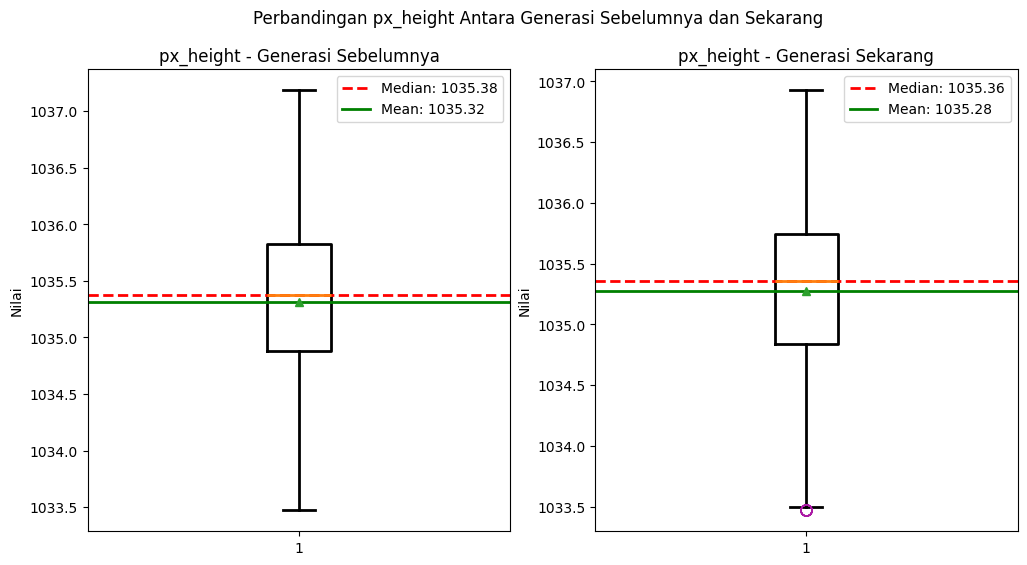

In [135]:
# Initialize constant variables
df_px_height = df["px_height"]
alpha = 0.05

df_px_height_head = df_px_height[:len(df)//2]
df_px_height_tail = df_px_height[len(df)//2:]

# Find degrees of freedom for head and tail
v_head = len(df_px_height_head) - 1
v_tail = len(df_px_height_tail) - 1

# Calculate f value
f = df_px_height_head.var() / df_px_height_tail.var()
f_upper = scp.f.ppf(1 - alpha/2, v_head, v_tail)
f_lower = scp.f.ppf(alpha/2, v_head, v_tail)

# Find z and p value
p = 1 - scp.f.cdf(f, v_head, v_tail)

display(Markdown(f"""
### Hasil Uji Hipotesis

- **Nilai f**: {f:.4f}
- **Nilai f upper**: {f_upper:.4f}
- **Nilai f lower**: {f_lower:.4f}
- **Nilai p**: {p:.4f}

"""))

# Hitung keputusan
if ((f > f_lower or f < f_upper) and p < alpha):
    decision = ("**Hipotesis H0 ditolak**, artinya Smartphone generasi lama tidak memiliki variansi dari tinggi smartphone yang sama dengan bagian generasi baru.")
else:
    decision = ("**Gagal menolak Hipotesis H0**, artinya Smartphone generasi lama memiliki variansi dari tinggi smartphone yang sama dengan bagian generasi baru.")
display(Markdown(f"### Keputusan\n{decision}"))

plot_solution_test(df_px_height_head, df_px_height_tail, "px_height")

### d. Apakah proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang?

**1. Tentukan nilai hipotesis nol ($H_0$)** <br>
$H_0$: Proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang? $(P(X_{1}>2030) = P(X_{2}>2030))$

**2. Tentukan hipotesis alternatif ($H_1$)** <br>
$H_1$: Proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya tidak lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang? $(P(X_{1}>2030) > P(X_{2}>2030))$

**3. Tentukan tingkat signifikan** <br>
Tingkat Signifikan $\alpha = 0.05$

**4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.** <br>
Uji statistik: **One Tailed Proportion Test** <br>
Critical section: $z > z_{alpha}$

**5. Hitung nilai uji statistik** <br>
Hitung nilai z dengan rumus

$$ z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p}\hat{q}({1/n_1} + {1/n_2})}} $$

dengan

$$ \hat{p} = \frac{x_1 + x_2}{n_1 + n_2}, \hat{q} = 1 - \hat{p}$$


Hitung nilai P

**6. KEPUTUSAN : Tolak $H_0$ jika $z > z_{alpha}$ dan $p < \alpha$**

Perhitungan Manual
Nilai z : -0.5528930627104814
Nilai p : 0.29016831902674933



### Hasil Uji Hipotesis

- **Nilai z**: -0.5529
- **Nilai p**: 0.2902



### Keputusan
**Gagal menolak Hipotesis H0**, artinya proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya tidak lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang.

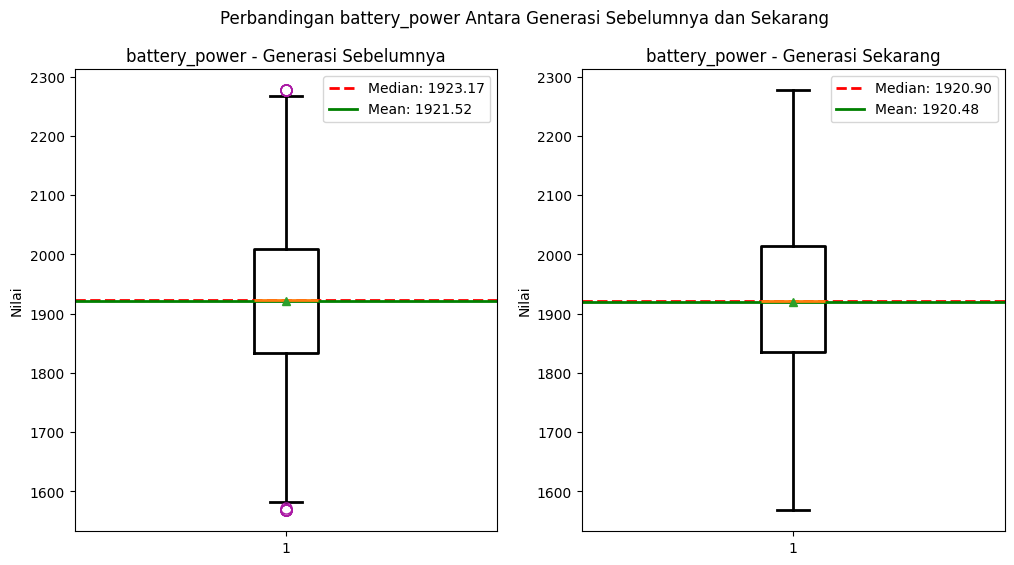

In [136]:
df_battery_power = df["battery_power"]
alpha = 0.05

df_battery_power_head = df_battery_power[:len(df)//2]
df_battery_power_tail = df_battery_power[len(df)//2:]

sum_battery_greater = [sum(df_battery_power_head > 2030), sum(df_battery_power_tail > 2030)]
sum_battery = [len(df_battery_power_head), len(df_battery_power_tail)]
z, p = proportions_ztest(sum_battery_greater, sum_battery, alternative='larger')

# Find z alpha value
z_alpha = scp.norm.ppf(1-alpha)


print("Perhitungan Manual")

p1 = sum_battery_greater[0] / sum_battery[0]
p2 = sum_battery_greater[1] / sum_battery[1]

p_hat = (sum_battery_greater[0] + sum_battery_greater[1]) / (sum_battery[0] + sum_battery[1])
q_hat = 1 - p_hat
z = (p1 - p2) / np.sqrt(p_hat * q_hat * (1 / sum_battery[0] + 1 / sum_battery[1]))
p = scp.norm.sf(abs(z))

print("Nilai z :", z)
print("Nilai p :", p)
display(Markdown(f"""
### Hasil Uji Hipotesis

- **Nilai z**: {z:.4f}
- **Nilai p**: {p:.4f}

"""))

# Hitung keputusan
if (z > z_alpha and p < alpha):
    decision = ("**Hipotesis H0 ditolak**, artinya proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang tidak lebih dari 2030 pada smartphone generasi sekarang.")
else:
    decision = ("**Gagal menolak Hipotesis H0**, artinya proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya tidak lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang.")
display(Markdown(f"### Keputusan\n{decision}"))

plot_solution_test(df_battery_power_head, df_battery_power_tail, "battery_power")